In [1]:
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
monthlyDf <- read.csv('../data/processed/monthly-supply-demand.csv', stringsAsFactors=FALSE)
head(monthlyDf)

Year,Month,SoybeanImports,SoybeanCrush,SoybeanExports,SoybeanMealBeginStocks,SoybeanMealProduction,SoybeanMealImports,SoybeanMealTotalQuanity,SoybeanMealDomesticUsed,⋯,CanolaSeedOilPrice,PeanutOilPrice,CornOilPrice,LardPrice,EdibleTallowPrice,SoybeanMealPrice,CottonseedMealPrice,SunflowerseedMealPrice,CanolaMealPrice,LinseedMealPrice
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,9,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006,10,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006,11,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006,12,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2007,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2007,2,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
quarterlyDf <- read.csv('../data/processed/quarterly-supply-demand.csv', stringsAsFactors=FALSE)
head(quarterlyDf)

Year,Month,OffFarmSoybeanStocks,OnFarmSoybeanStocks,ProducedSoybeanStocks,SoybeanBeginStocks,SoybeanProduction,SoybeanImports,SoybeanTotalQuanity,SoybeanCrush,SoybeanExports,SoybeanSeedsFeedResidual,SoybeanTotalUsed,SoybeanEndStocks
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1999,12,1032666000,1.150e+09,2182666000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,3,665986000,7.300e+08,1395986000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,6,404425000,3.700e+08,774425000,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000,9,177662000,1.125e+08,290162000,290162000,2757810000,901033.7,3048873034,421136667,315767605,71977762,808882034,2239991000
2000,12,1022991000,1.217e+09,2239991000,2239991000,0,800019.5,2240791020,417936667,336291092,82655260,836883020,1403908000
2001,3,623908000,7.800e+08,1403908000,1403908000,0,813366.7,1404721367,405486667,227730251,63324449,696541367,708180000


In [4]:
yearlyDf <- read.csv('../data/processed/yearly-supply-demand.csv', stringsAsFactors=FALSE)
head(yearlyDf)

Year,SoybeanPlanted,SoybeanHarvested,SoybeanValue,SoybeanBeginStocks,SoybeanProduction,SoybeanImports,SoybeanTotalQuanity,SoybeanCrush,SoybeanExports,⋯,SunflowerSeedOilPrice,CanolaSeedOilPrice,PeanutOilPrice,CornOilPrice,LardPrice,EdibleTallowPrice,CottonseedMealPrice,SunflowerseedMealPrice,CanolaMealPrice,LinseedMealPrice
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1960,24440000,23655000,1184910000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1961,27787000,27003000,1543909000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1962,28418000,27608000,1564352000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1963,29462000,28615000,1755076000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1964,31721000,30793000,1836441000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1965,35227000,34449000,2151305000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
yields <- read.csv('../data/processed/yields-by-country.csv', stringsAsFactors=FALSE)
head(yields)

Year,State,County,AgDistrict,Yield
<int>,<chr>,<chr>,<chr>,<dbl>
1950,ALABAMA,AUTAUGA,COASTAL PLAINS & GULF COAST,15
1950,ALABAMA,BALDWIN,HISTORIC DISTRICT 70,20
1950,ALABAMA,BARBOUR,HISTORIC DISTRICT 90,15
1950,ALABAMA,BIBB,HISTORIC DISTRICT 21,15
1950,ALABAMA,BLOUNT,HISTORIC DISTRICT 21,13
1950,ALABAMA,BULLOCK,HISTORIC DISTRICT 90,16


In [6]:
gdpDeflator <- read.csv('../data/processed/gdp-deflactor.csv', stringsAsFactors = FALSE)
head(gdpDeflator)

Date,GDPDef
<chr>,<dbl>
1947-01-01,0.119600
1947-01-02,0.119619
1947-01-03,0.119638
1947-01-04,0.119657
1947-01-05,0.119676
1947-01-06,0.119695


In [7]:
cornSoybean <- read.csv('../data/processed/misc-corn-soybean.csv', stringsAsFactors = FALSE) %>% 
    mutate(
        PriceRatio = SoybeanPrice / CornPrice,
        PriceRatioYieldAdj = (SoybeanPrice * SoybeanYield) / (CornPrice * CornYield),
        PlantedRatio = SoybeanPlanted / CornPlanted,
        NextPlantedRatioChange = lead(PlantedRatio) - PlantedRatio
    )
head(cornSoybean)

Year,CornPlanted,CornPrice,CornProduction,CornYield,SoybeanPlanted,SoybeanPrice,SoybeanProduction,SoybeanYield,SoybeanRealPrice,CornRealPrice,PriceRatio,PriceRatioYieldAdj,PlantedRatio,NextPlantedRatioChange
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1960,81425000,1.00,3906949000,54.7,24440000,2.13,555085000,23.5,12.78433,6.002033,2.130000,0.9150823,0.3001535,0.121378971
1961,65919000,1.10,3597803000,62.4,27787000,2.28,678554000,25.1,13.53764,6.531319,2.072727,0.8337413,0.4215325,0.015553198
1962,65017000,1.12,3606311000,64.7,28418000,2.34,669186000,24.2,13.73179,6.572479,2.089286,0.7814639,0.4370857,-0.008678362
1963,68771000,1.11,4019238000,67.9,29462000,2.51,699165000,24.4,14.55502,6.436682,2.261261,0.8125887,0.4284073,0.053506294
1964,65823000,1.17,3484253000,62.9,31721000,2.62,700921000,22.8,14.96158,6.681318,2.239316,0.8117076,0.4819136,0.058618215
1965,65171000,1.16,4102867000,74.1,35227000,2.54,845608000,24.5,14.23429,6.500698,2.189655,0.7239751,0.5405318,0.021573463


In [8]:
graphData <- function(vars, start=1960, end=2019, rescale=FALSE) {
    if(rescale) {
        yearlyGraph %>% 
            filter(Variable %in% vars) %>% 
            group_by(Variable) %>% 
            mutate(Centered = (Number - mean(Number, na.rm=TRUE)) / sd(Number, na.rm=TRUE)) %>% 
        ggplot(aes(Year, Centered, color=Variable)) +
            geom_line() +
            expand_limits(y=0, x=start) +
            scale_x_continuous(limits=c(start, end))
    }
    else {
        yearlyGraph %>% 
            filter(Variable %in% vars) %>% 
        ggplot(aes(Year, Number, color=Variable)) +
            geom_line() +
            expand_limits(y=0, x=start) +
            scale_x_continuous(limits=c(start, end))
    }
}

yearlyGraph <- yearlyDf %>% 
    gather(Variable, Number, -Year)
head(yearlyGraph)

Year,Variable,Number
<int>,<chr>,<dbl>
1960,SoybeanPlanted,24440000
1961,SoybeanPlanted,27787000
1962,SoybeanPlanted,28418000
1963,SoybeanPlanted,29462000
1964,SoybeanPlanted,31721000
1965,SoybeanPlanted,35227000


Warning message:
“Removed 2 rows containing missing values (geom_path).”

function (...) 
{
    quos(...)
}
<environment: namespace:dplyr>

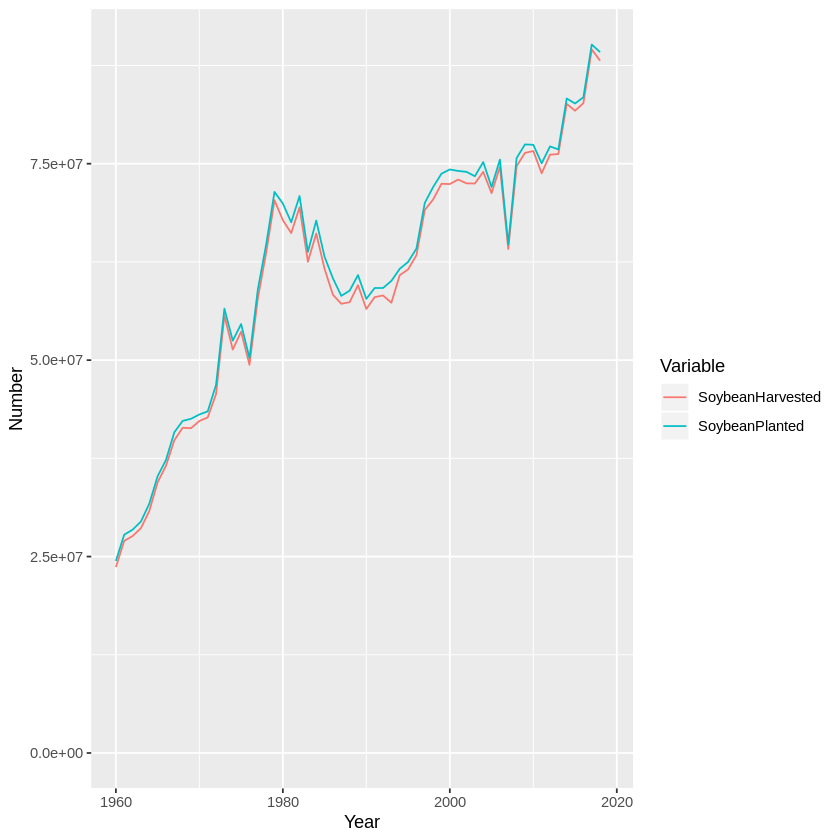

In [9]:
graphData(c('SoybeanPlanted', 'SoybeanHarvested'))
vars

Warning message:
“Removed 21 rows containing missing values (geom_path).”

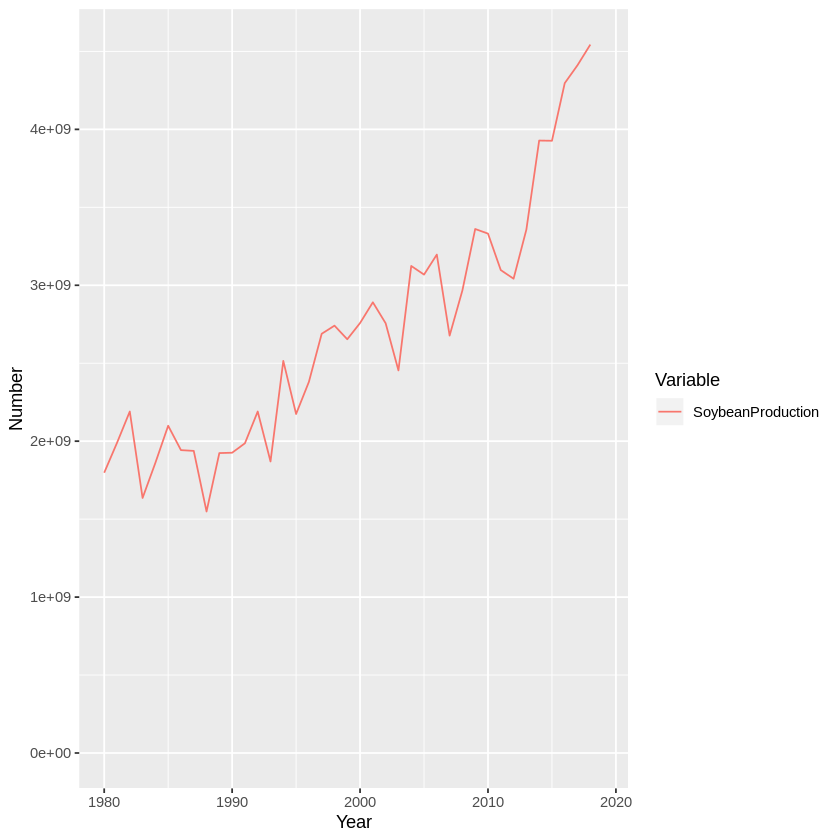

In [10]:
graphData('SoybeanProduction', 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

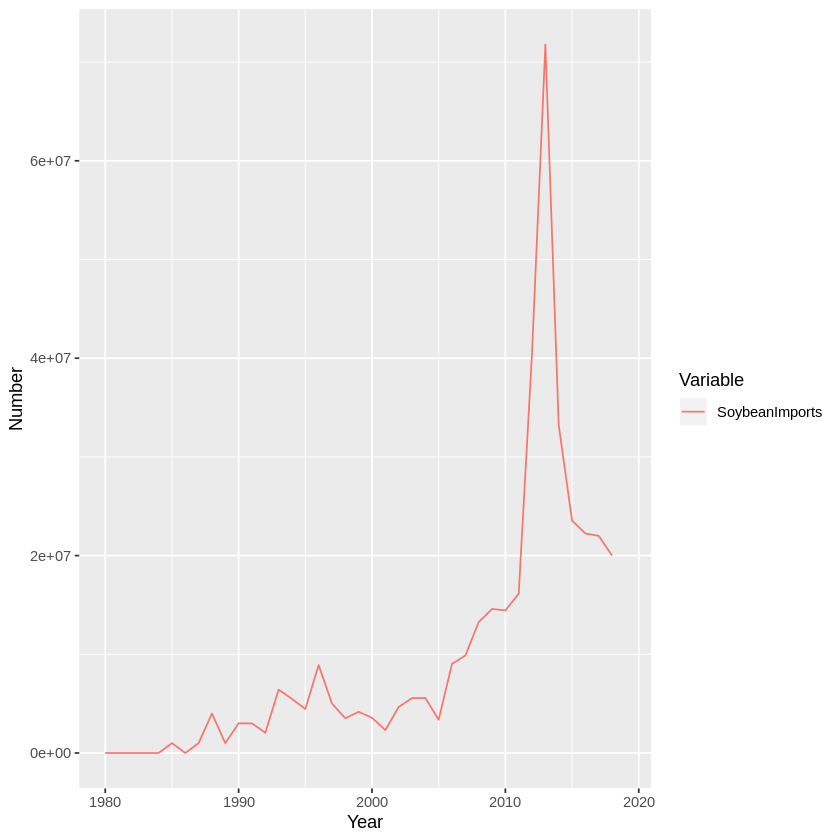

In [11]:
graphData('SoybeanImports', 1980)

Warning message:
“Removed 84 rows containing missing values (geom_path).”

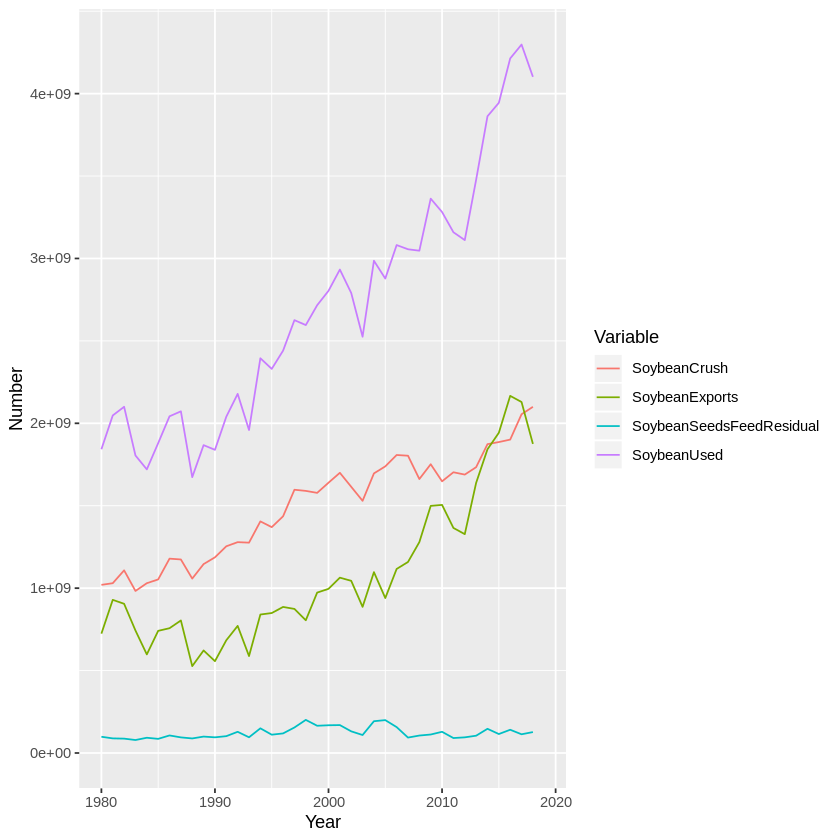

In [12]:
graphData(c('SoybeanCrush', 'SoybeanExports', 'SoybeanSeedsFeedResidual', 'SoybeanUsed'), 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

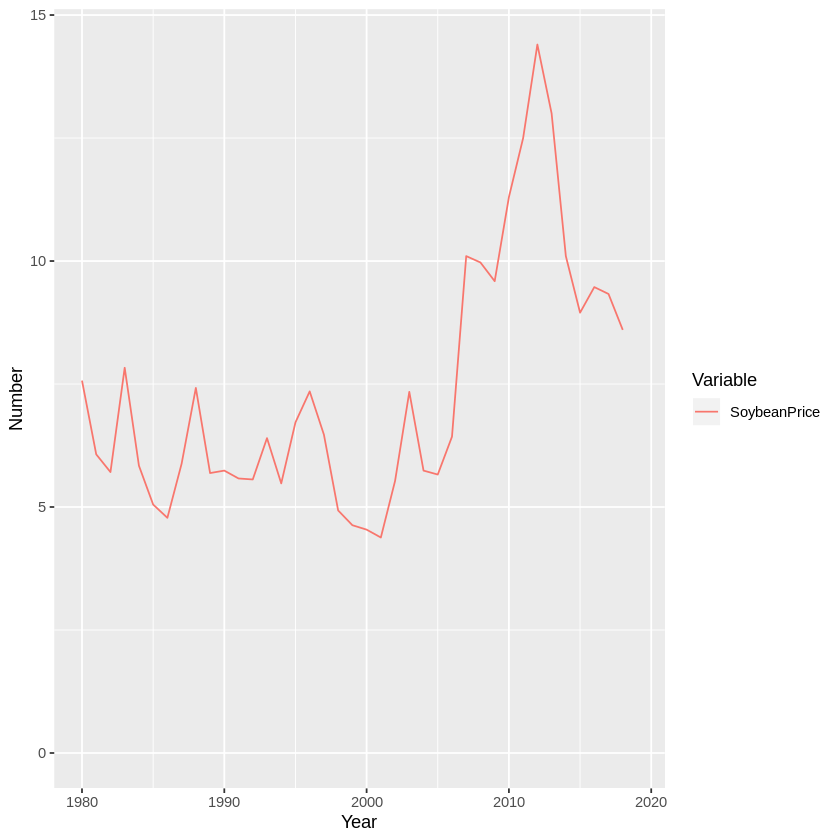

In [13]:
graphData('SoybeanPrice', 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

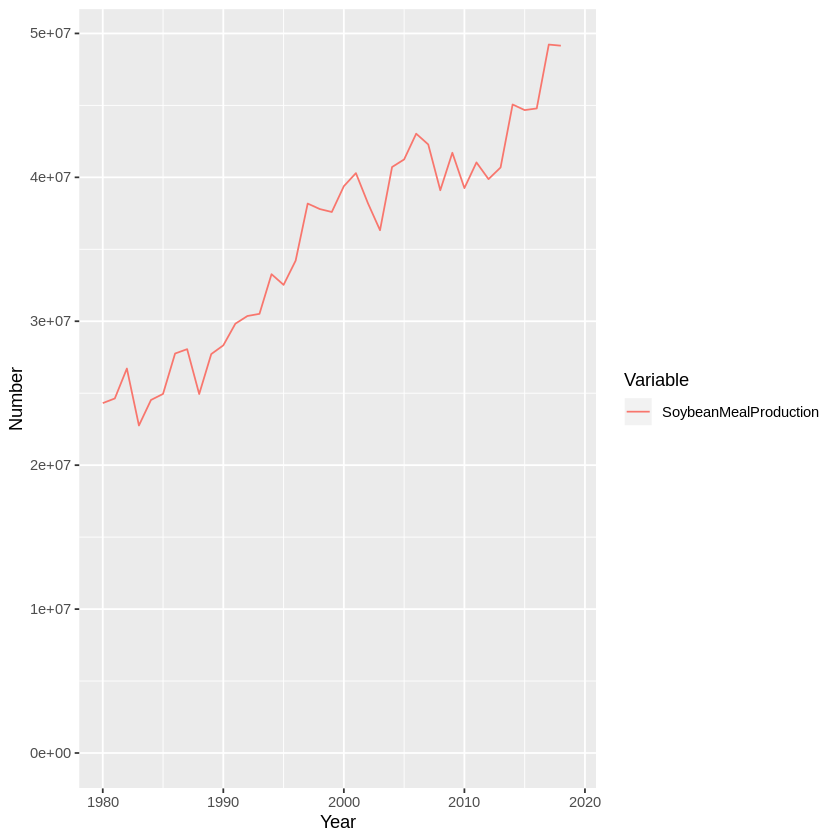

In [14]:
graphData('SoybeanMealProduction', 1980)

What happened in 2012? Imports rose that year, and it looks like soybean meal feel in that period.

Warning message:
“Removed 63 rows containing missing values (geom_path).”

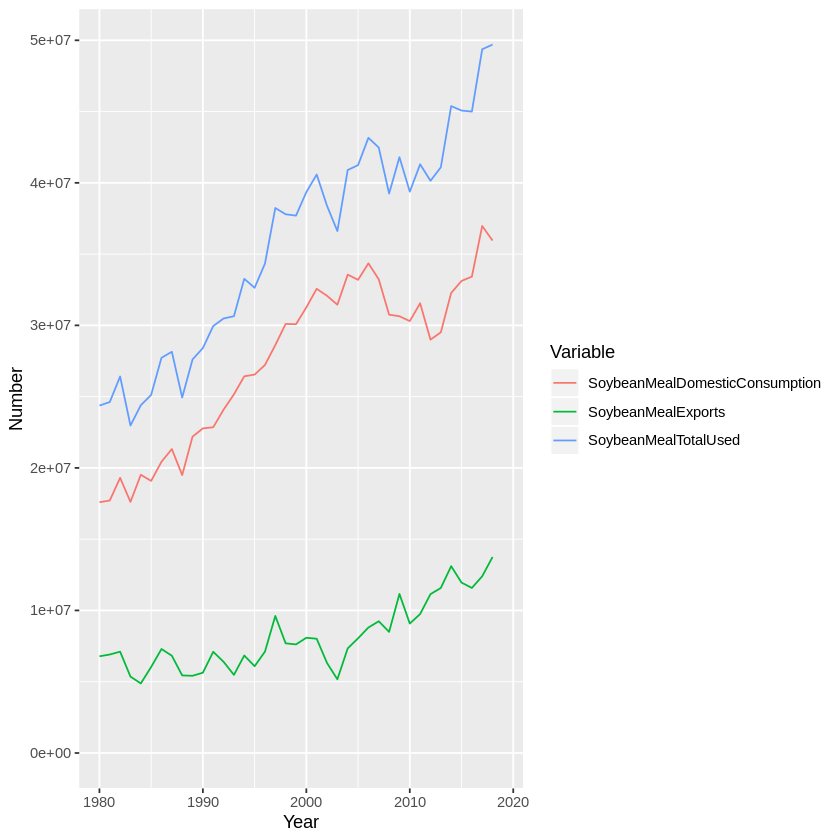

In [15]:
graphData(c('SoybeanMealTotalUsed', 'SoybeanMealDomesticConsumption', 'SoybeanMealExports'), 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

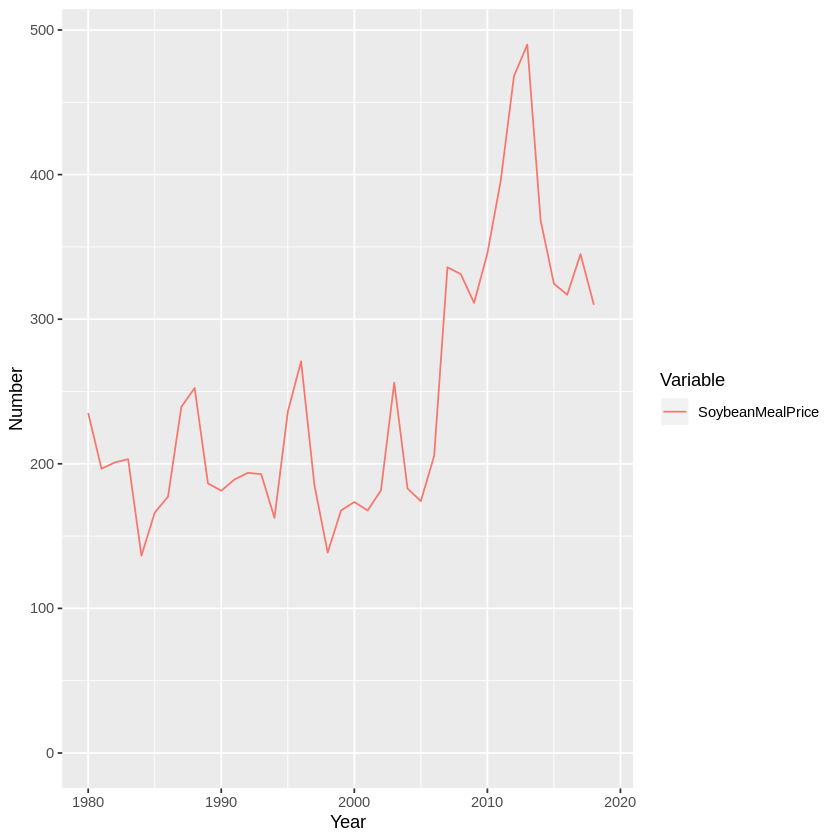

In [16]:
graphData(c('SoybeanMealPrice'), 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

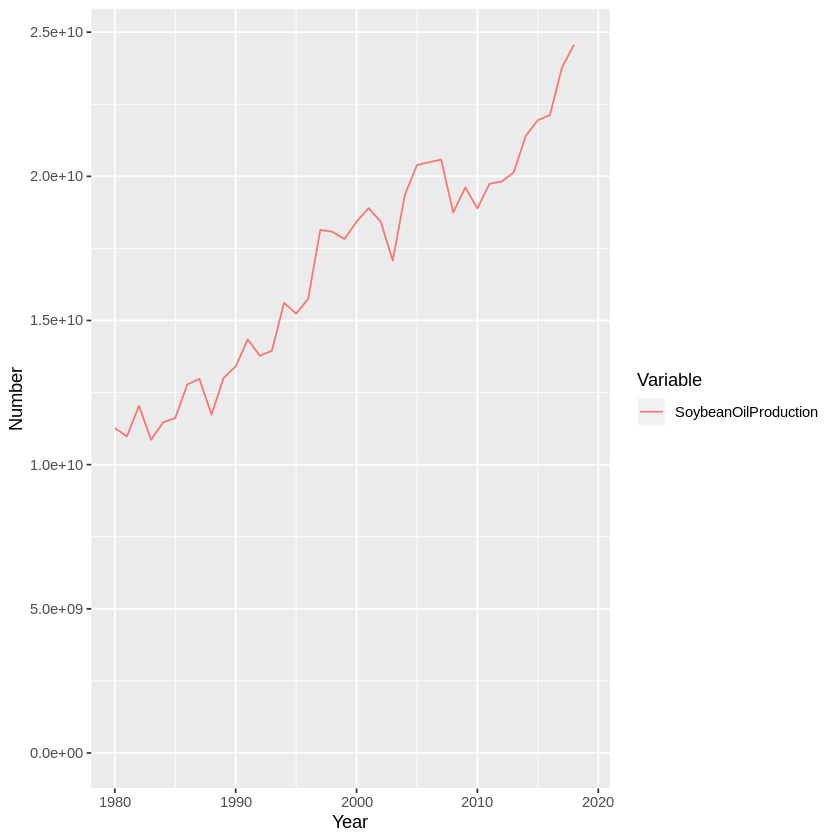

In [17]:
graphData('SoybeanOilProduction', 1980)

Warning message:
“Removed 63 rows containing missing values (geom_path).”

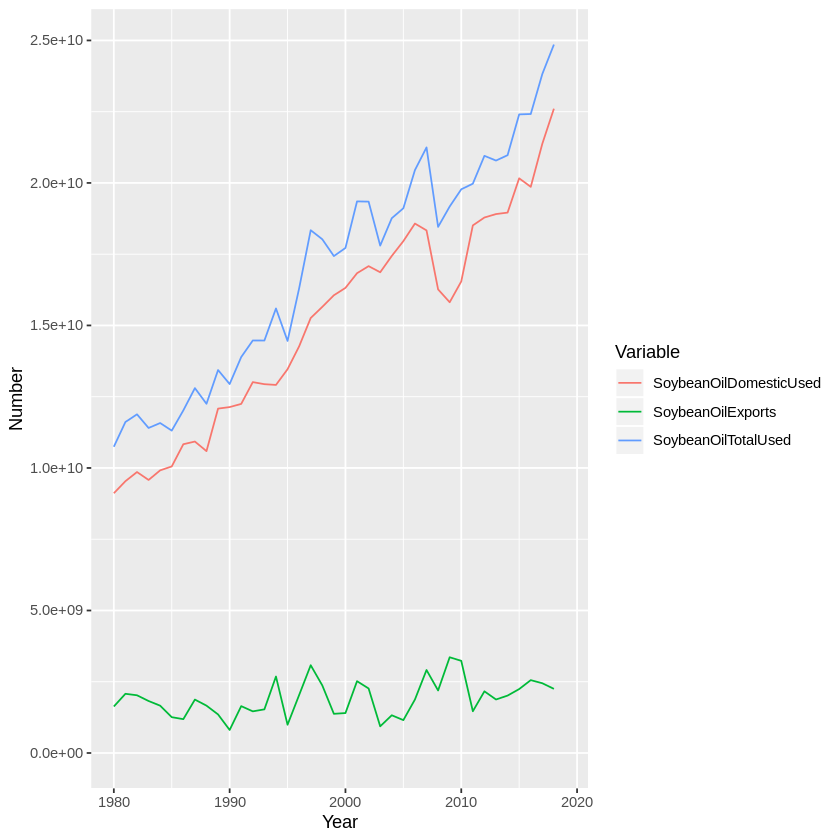

In [18]:
graphData(c('SoybeanOilDomesticUsed', 'SoybeanOilExports', 'SoybeanOilTotalUsed'), 1980)

Warning message:
“Removed 21 rows containing missing values (geom_path).”

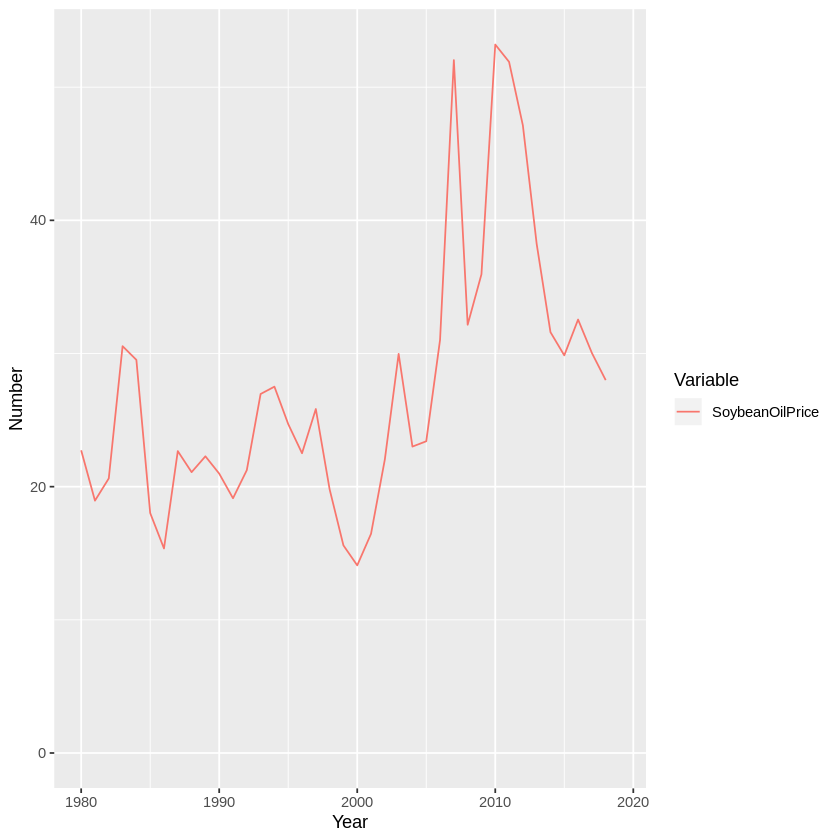

In [19]:
graphData('SoybeanOilPrice', 1980)

TODO: Find data for 2011-2014

Warning message:
“Removed 64 rows containing missing values (geom_path).”

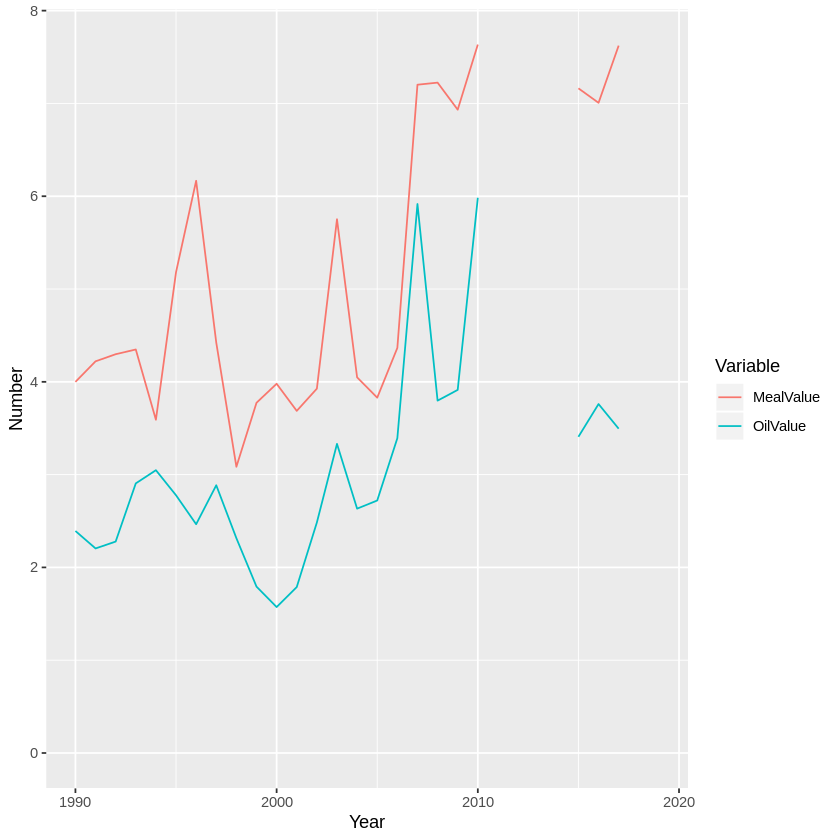

In [20]:
graphData(c('OilValue', 'MealValue'), 1990)

Warning message:
“Removed 32 rows containing missing values (geom_path).”

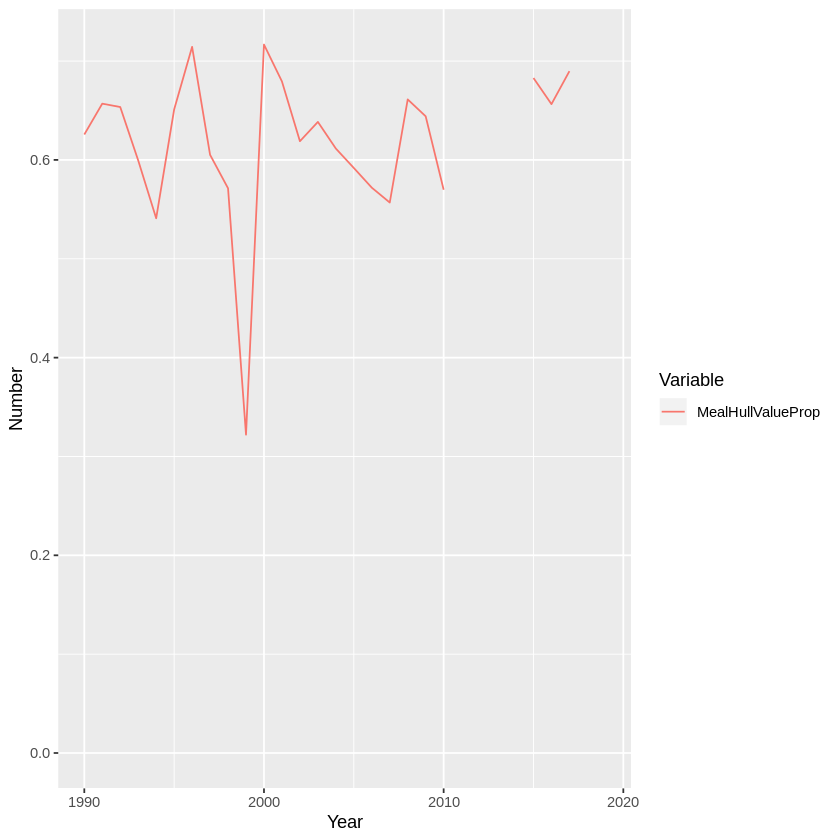

In [21]:
graphData('MealHullValueProp', 1990)

Warning message:
“Removed 49 rows containing missing values (geom_path).”

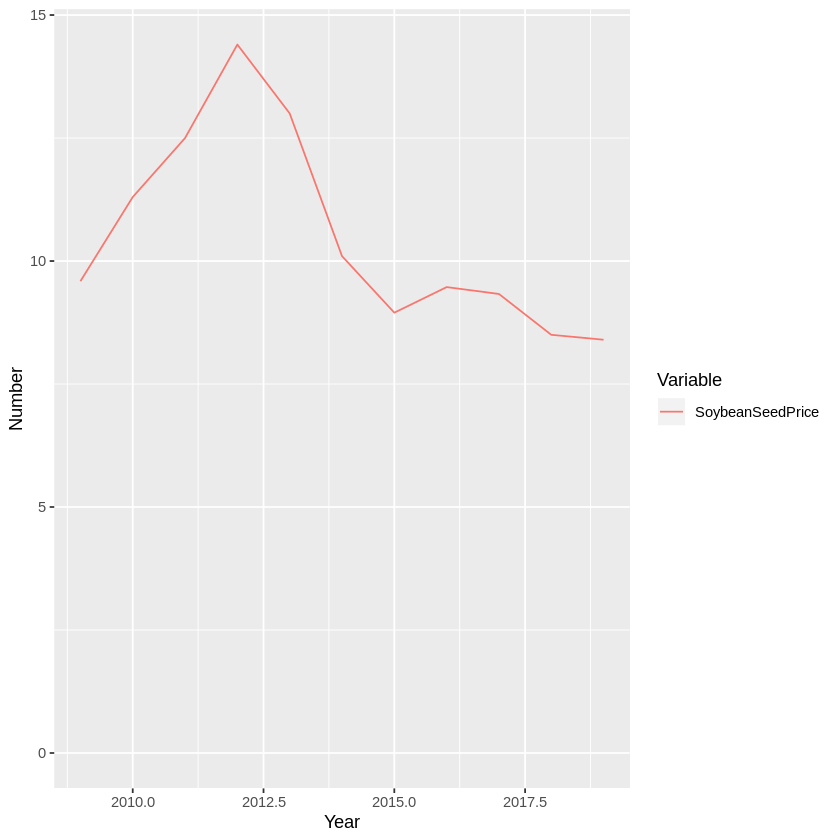

In [22]:
graphData('SoybeanSeedPrice', 2009)

Warning message:
“Removed 50 rows containing missing values (geom_path).”

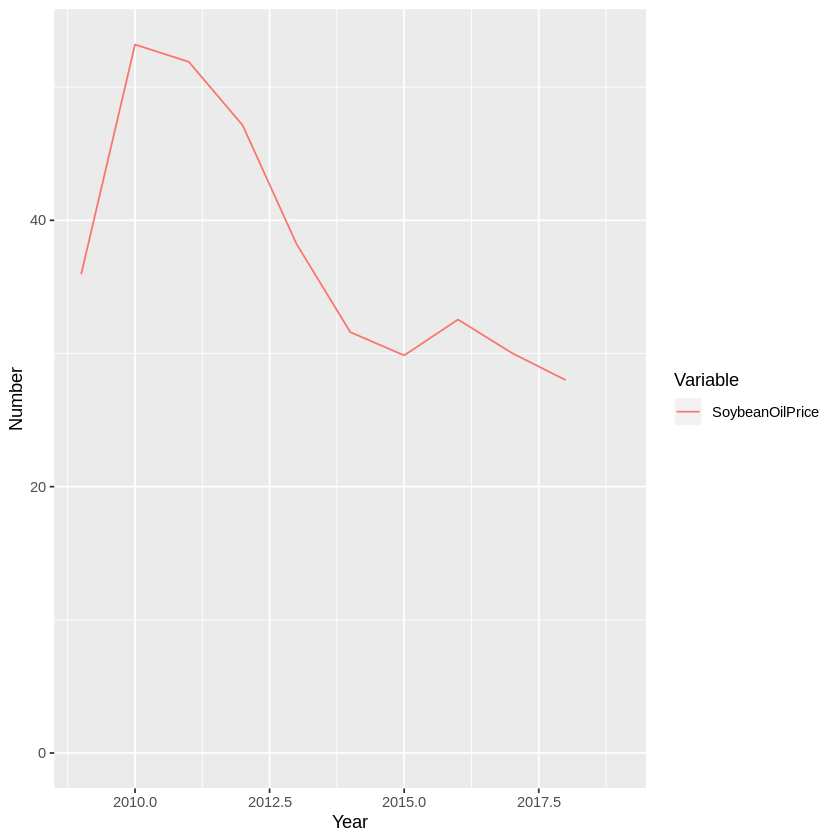

In [23]:
graphData('SoybeanOilPrice', 2009)

Warning message:
“Removed 50 rows containing missing values (geom_path).”

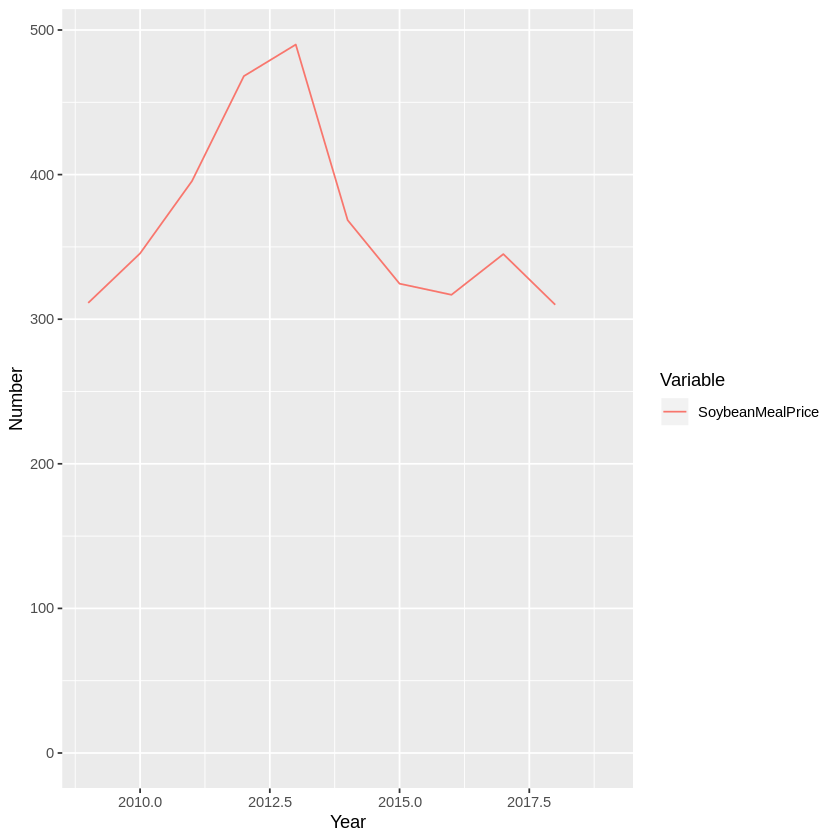

In [24]:
graphData('SoybeanMealPrice', 2009)

Warning message:
“Removed 294 rows containing missing values (geom_path).”

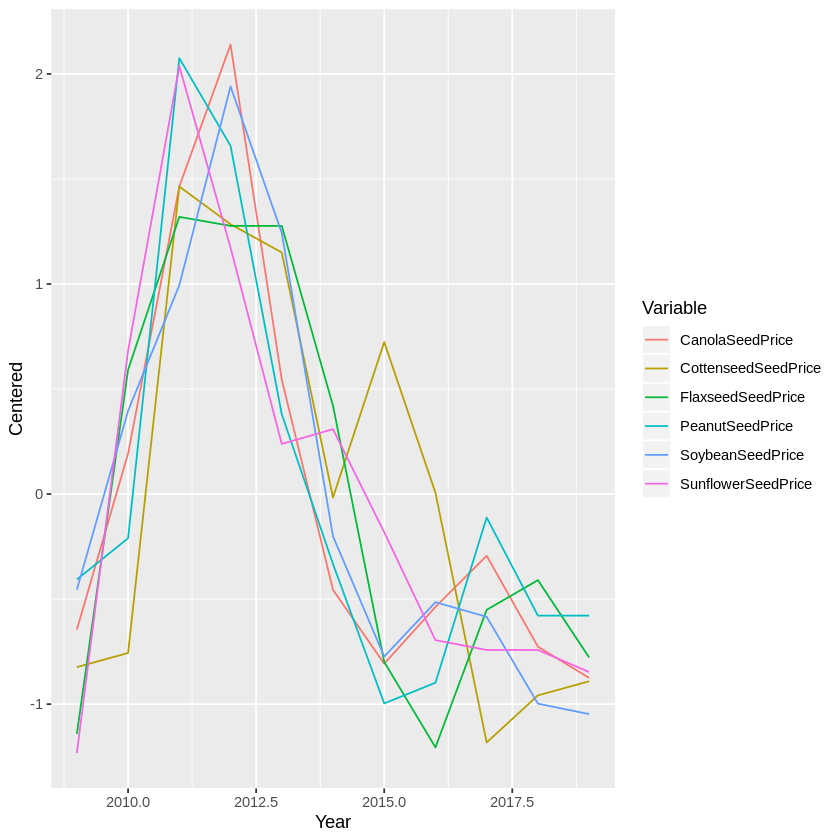

In [25]:
graphData(c('SoybeanSeedPrice', 'CottenseedSeedPrice', 'SunflowerSeedPrice', 'CanolaSeedPrice', 
           'PeanutSeedPrice', 'FlaxseedSeedPrice'), 2009, rescale=TRUE)

Warning message:
“Removed 344 rows containing missing values (geom_path).”

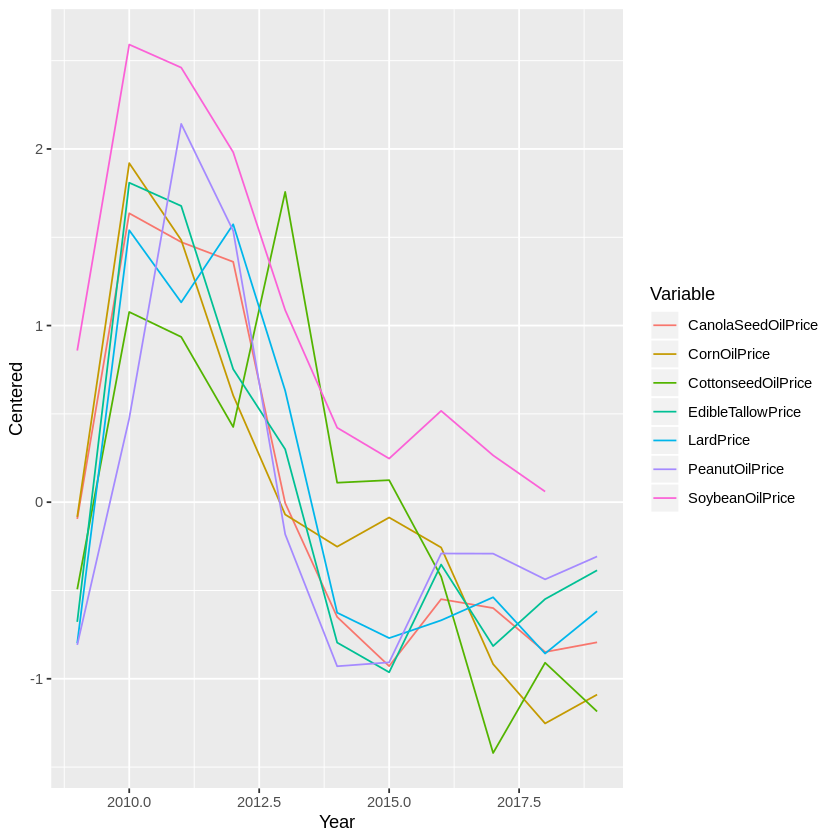

In [26]:
graphData(c('CottonseedOilPrice', 'CanolaSeedOilPrice', 'PeanutOilPrice', 'CornOilPrice', 'LardPrice',
           'SoybeanOilPrice', 'EdibleTallowPrice'), 
          2009, rescale=TRUE)

Warning message:
“Removed 246 rows containing missing values (geom_path).”

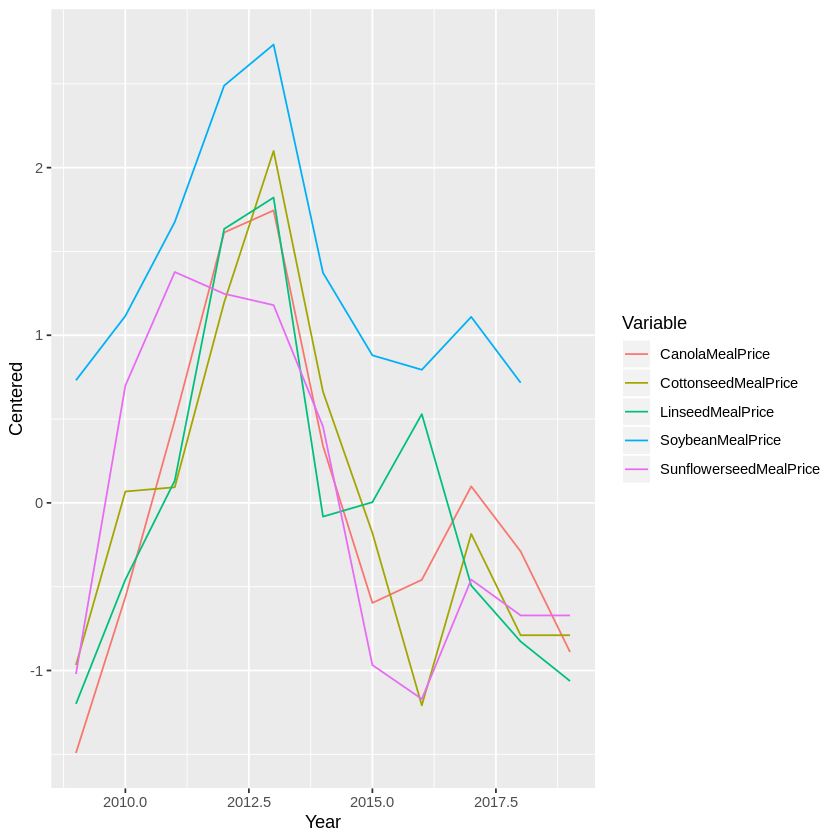

In [27]:
graphData(c('SoybeanMealPrice', 'CottonseedMealPrice', 'SunflowerseedMealPrice', 'CanolaMealPrice',
            'LinseedMealPrice'), 2009, rescale=TRUE)

Warning message:
“Removed 63 rows containing missing values (geom_path).”

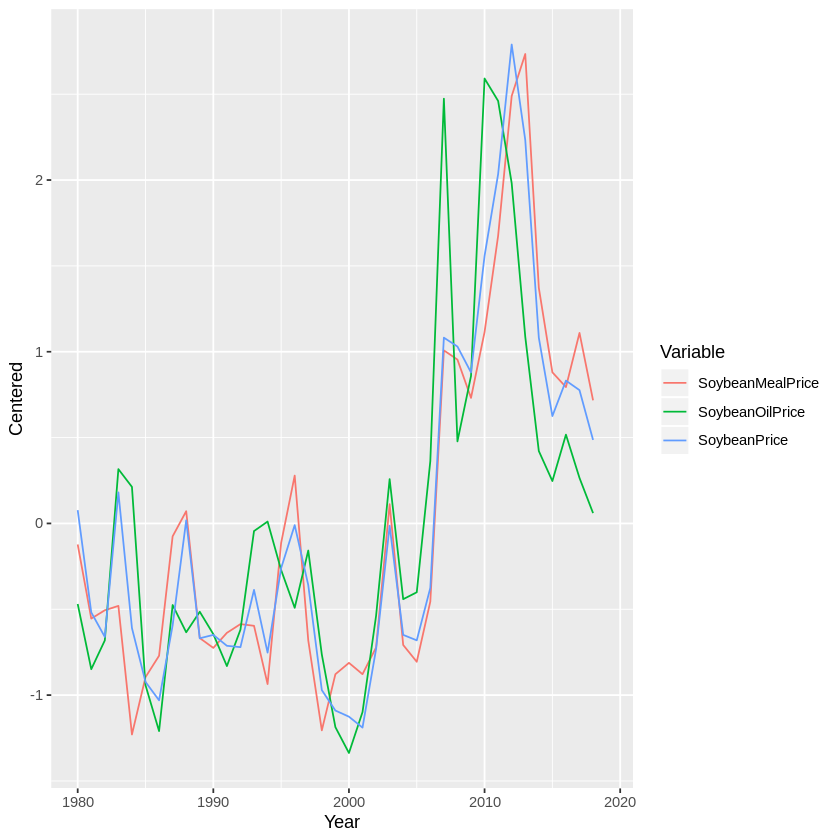

In [28]:
graphData(c('SoybeanPrice', 'SoybeanMealPrice', 'SoybeanOilPrice'), 1980, rescale=TRUE)

In [29]:
yearlyYield <- yields %>% 
    group_by(Year) %>% 
    summarise(
        MeanYield = mean(Yield)
    )
head(yearlyYield)

Year,MeanYield
<int>,<dbl>
1950,18.45439
1951,17.92055
1952,18.07829
1953,15.91378
1954,16.33142
1955,17.52100


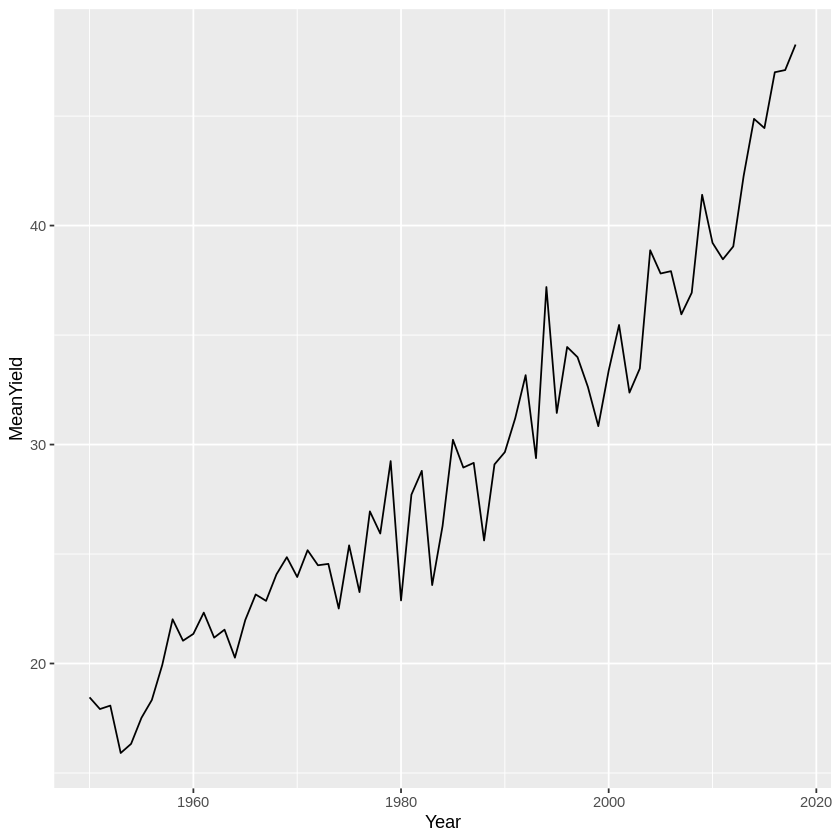

In [30]:
ggplot(yearlyYield) +
    geom_line(aes(Year, MeanYield))

Warning message:
“Removed 50 rows containing missing values (geom_path).”

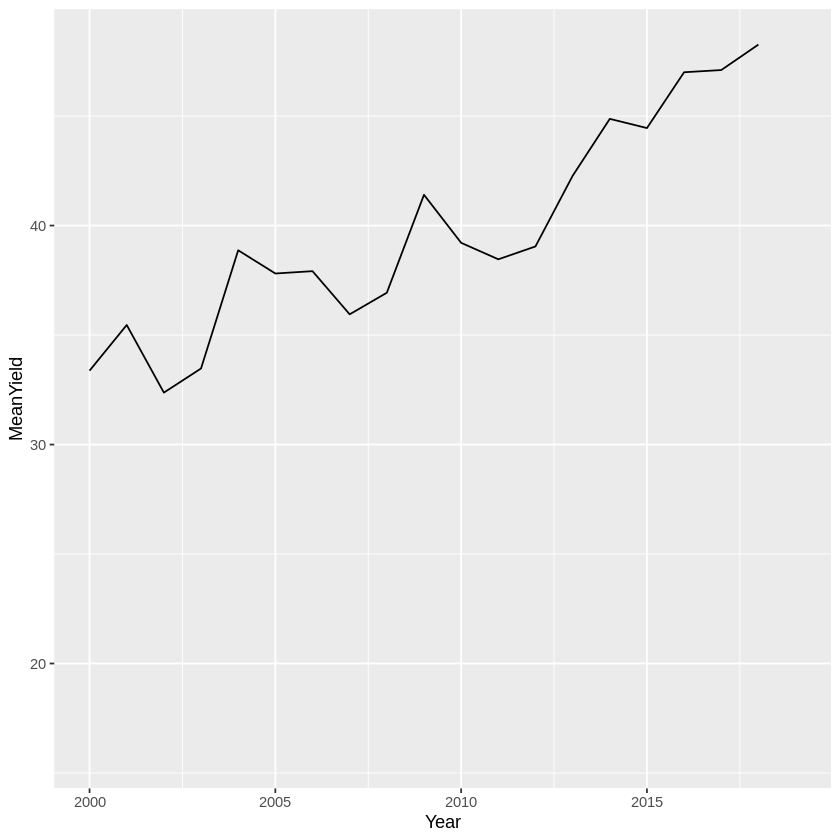

In [31]:
ggplot(yearlyYield) +
    geom_line(aes(Year, MeanYield)) +
    scale_x_continuous(limits=c(2000, 2019))

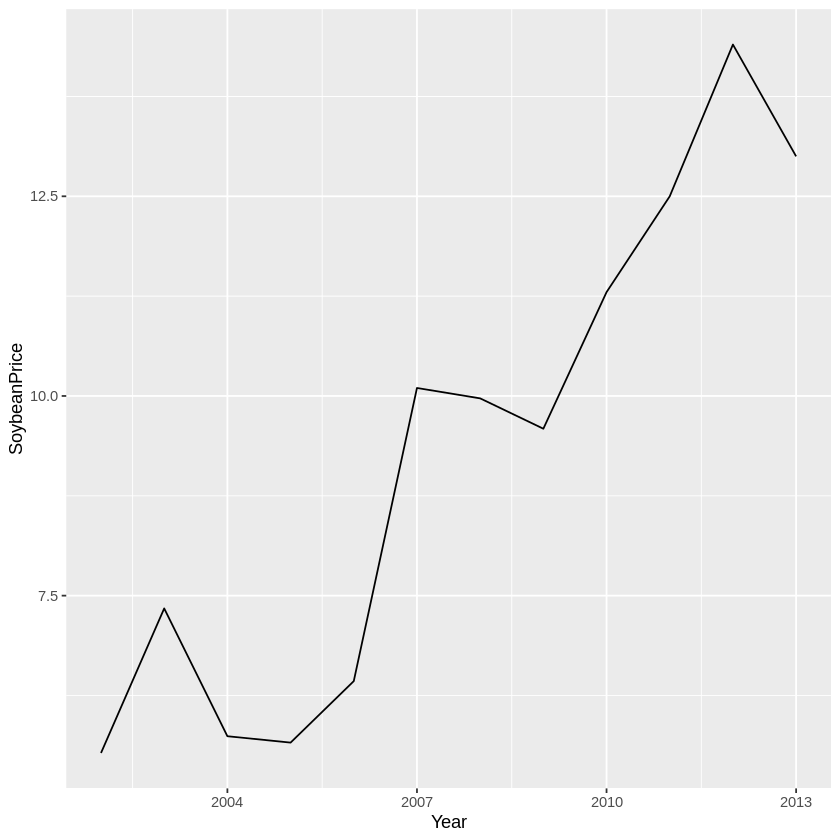

In [32]:
yearlyDf %>% 
    filter(Year >= 2002, Year <= 2013) %>% 
ggplot(aes(Year, SoybeanPrice)) +
    geom_line() 

Warning message:
“Removed 53 rows containing missing values (geom_path).”

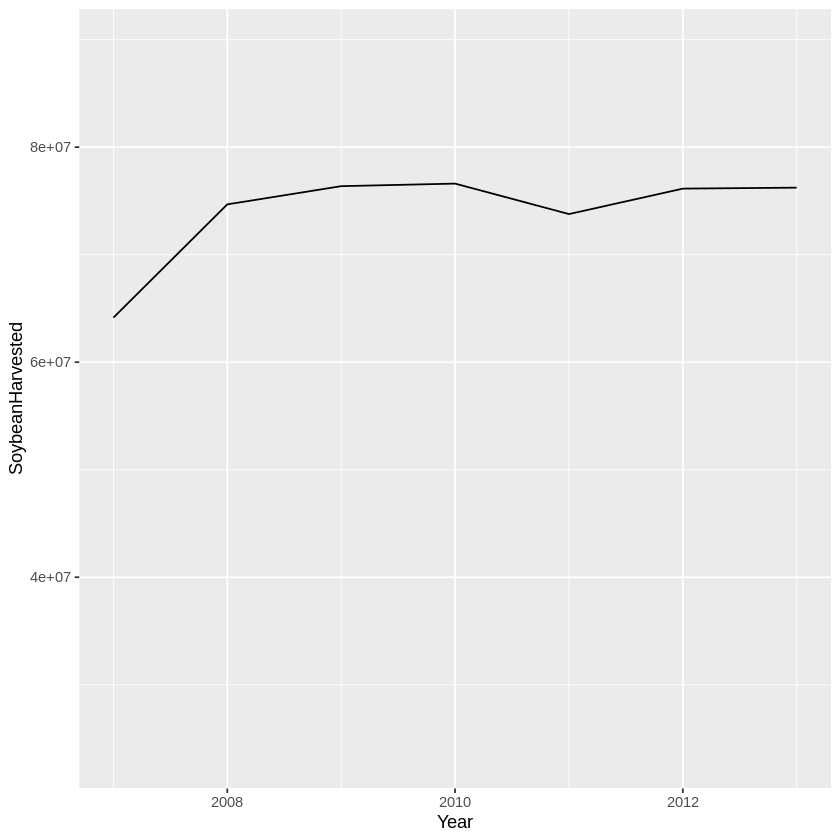

In [33]:
ggplot(yearlyDf, aes(Year, SoybeanHarvested)) +
    geom_line() +
    scale_x_continuous(limits=c(2007, 2013))

In [34]:
lagPrices <- gdpDeflator %>% 
    mutate(Year = as.numeric(str_sub(Date, 1, 4))) %>% 
    group_by(Year) %>% 
    summarise(
        MeanGDPDef = mean(GDPDef)
    ) %>% 
    right_join(yearlyDf, 'Year') %>% 
    mutate(
        RealSoybeanPrice = SoybeanPrice / MeanGDPDef,
        Lag1Price = lag(RealSoybeanPrice),
        Lag2Price = lag(Lag1Price),
        Lag3Price = lag(Lag2Price),
        Lead1Price = lead(RealSoybeanPrice)
    )

Warning message:
“Removed 21 rows containing missing values (geom_point).”

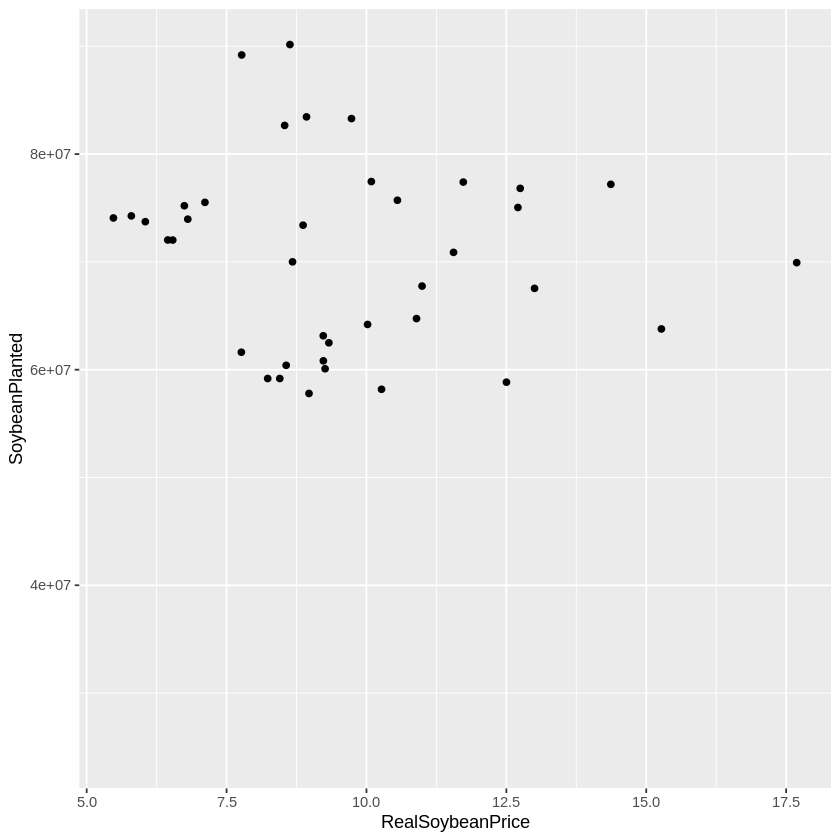

In [35]:
ggplot(lagPrices, aes(RealSoybeanPrice, SoybeanPlanted)) +
    geom_point()

Warning message:
“Removed 22 rows containing missing values (geom_point).”

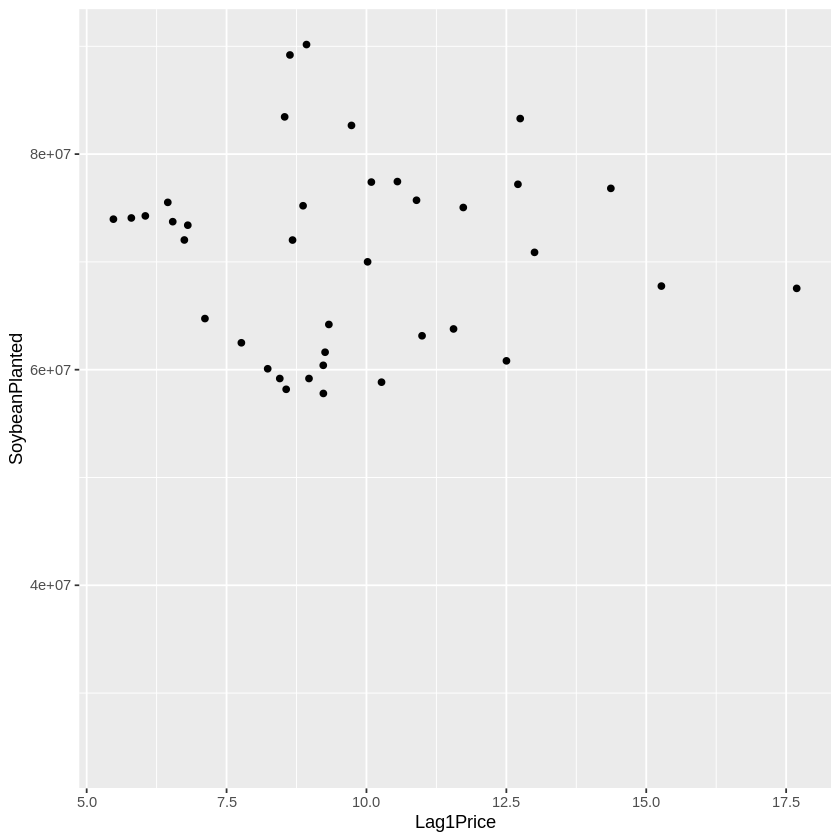

In [36]:
ggplot(lagPrices, aes(Lag1Price, SoybeanPlanted)) +
    geom_point()

Warning message:
“Removed 23 rows containing missing values (geom_point).”

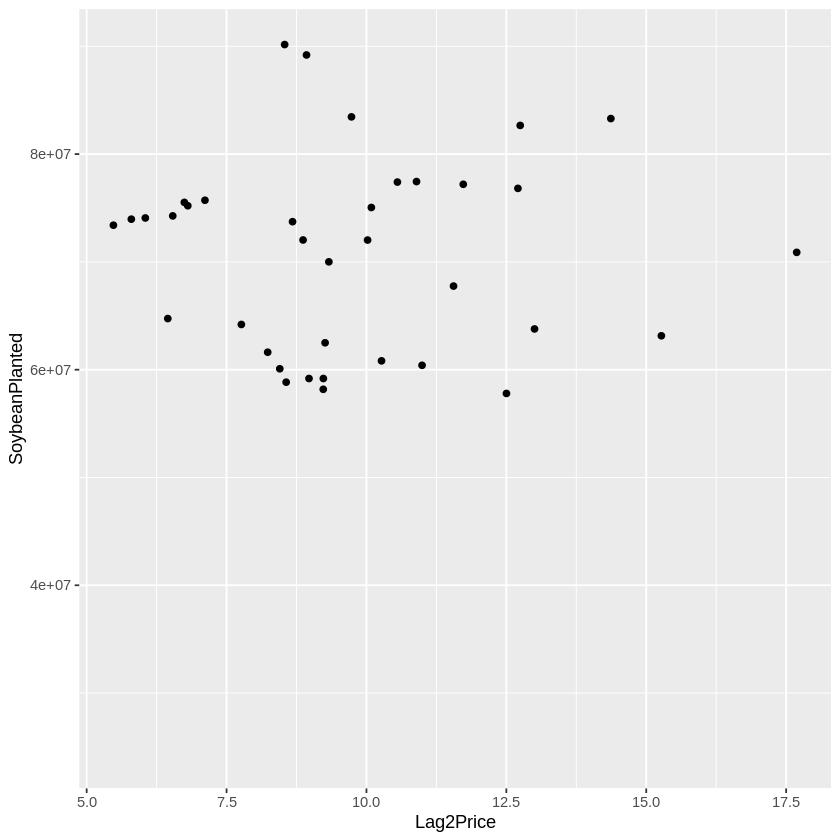

In [37]:
ggplot(lagPrices, aes(Lag2Price, SoybeanPlanted)) +
    geom_point()

Warning message:
“Removed 24 rows containing missing values (geom_point).”

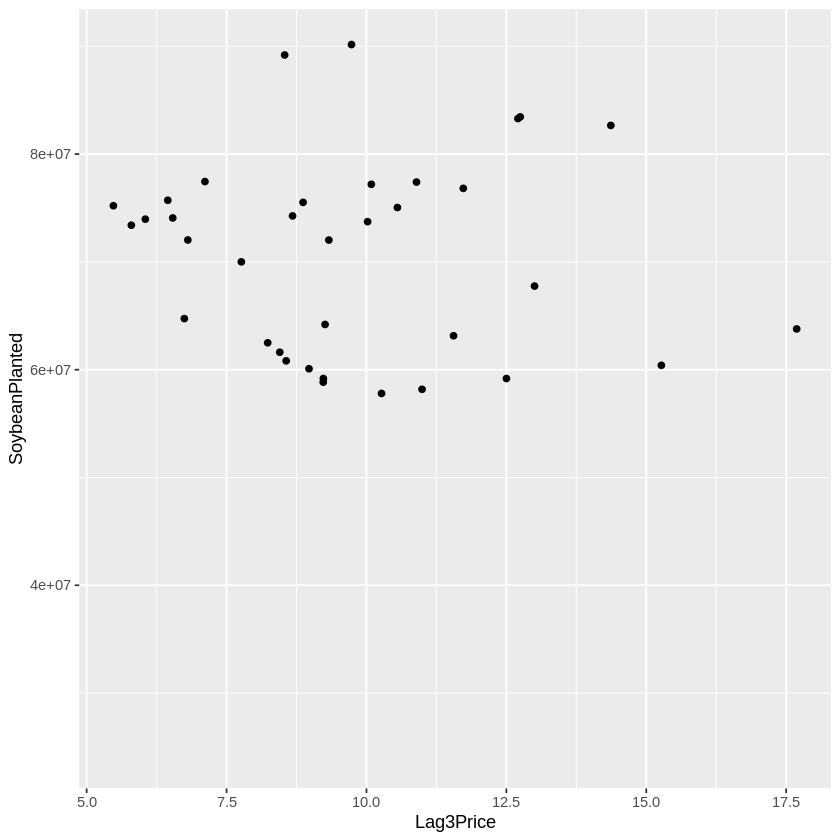

In [38]:
ggplot(lagPrices, aes(Lag3Price, SoybeanPlanted)) +
    geom_point()

Warning message:
“Removed 21 rows containing missing values (geom_point).”

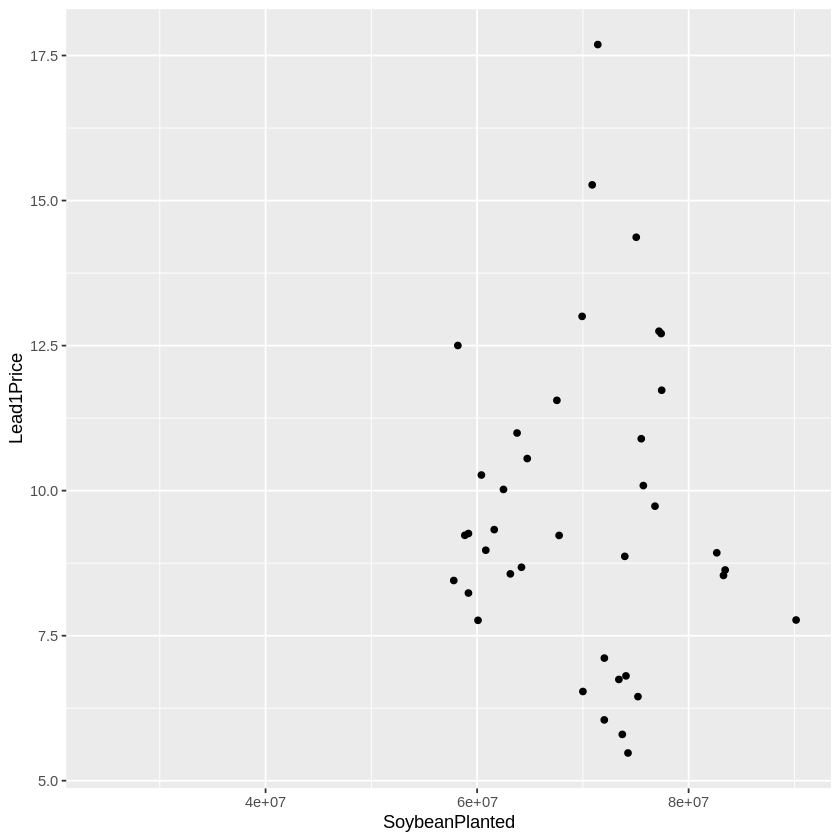

In [39]:
ggplot(lagPrices, aes(SoybeanPlanted, Lead1Price)) +
    geom_point()

In [40]:
summary(lm(SoybeanPlanted~RealSoybeanPrice, data=lagPrices))


Call:
lm(formula = SoybeanPlanted ~ RealSoybeanPrice, data = lagPrices)

Residuals:
      Min        1Q    Median        3Q       Max 
-13049356  -7908538   1020720   5546726  19188318 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      74252378    5293392  14.027   <2e-16 ***
RealSoybeanPrice  -379803     529932  -0.717    0.478    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8785000 on 37 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.01369,	Adjusted R-squared:  -0.01296 
F-statistic: 0.5137 on 1 and 37 DF,  p-value: 0.4781


In [41]:
summary(lm(SoybeanPlanted~RealSoybeanPrice+Lag1Price, data=lagPrices))


Call:
lm(formula = SoybeanPlanted ~ RealSoybeanPrice + Lag1Price, data = lagPrices)

Residuals:
      Min        1Q    Median        3Q       Max 
-12989011  -8022061    385858   6118405  19225903 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      74162473    6216752  11.929 6.92e-14 ***
RealSoybeanPrice  -878075     901629  -0.974    0.337    
Lag1Price          487609     789820   0.617    0.541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8972000 on 35 degrees of freedom
  (22 observations deleted due to missingness)
Multiple R-squared:  0.02682,	Adjusted R-squared:  -0.02879 
F-statistic: 0.4823 on 2 and 35 DF,  p-value: 0.6214


In [42]:
summary(lm(SoybeanPlanted~RealSoybeanPrice+Lag1Price+Lag2Price, data=lagPrices))


Call:
lm(formula = SoybeanPlanted ~ RealSoybeanPrice + Lag1Price + 
    Lag2Price, data = lagPrices)

Residuals:
      Min        1Q    Median        3Q       Max 
-12539700  -7807959    940216   5727785  19017329 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      73485665    6978837  10.530 4.38e-12 ***
RealSoybeanPrice  -976786     941117  -1.038    0.307    
Lag1Price          886981    1164188   0.762    0.452    
Lag2Price         -214139     812016  -0.264    0.794    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9196000 on 33 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.0327,	Adjusted R-squared:  -0.05524 
F-statistic: 0.3718 on 3 and 33 DF,  p-value: 0.7738


In [43]:
summary(lm(SoybeanPlanted~Lead1Price, data=lagPrices))


Call:
lm(formula = SoybeanPlanted ~ Lead1Price, data = lagPrices)

Residuals:
      Min        1Q    Median        3Q       Max 
-12475956  -7356701   1485028   5481045  19814797 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71217153    4990719  14.270   <2e-16 ***
Lead1Price   -111962     499631  -0.224    0.824    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8283000 on 37 degrees of freedom
  (21 observations deleted due to missingness)
Multiple R-squared:  0.001355,	Adjusted R-squared:  -0.02564 
F-statistic: 0.05022 on 1 and 37 DF,  p-value: 0.8239


In [44]:
soybeanSupplyInfo <- lagPrices %>% 
    select(Year, SoybeanPlanted, SoybeanHarvested, RealSoybeanPrice) %>% 
    left_join(yearlyYield, 'Year')

head(yearlyYield)

Year,MeanYield
<int>,<dbl>
1950,18.45439
1951,17.92055
1952,18.07829
1953,15.91378
1954,16.33142
1955,17.52100


In [45]:
model <- lm(MeanYield~poly(Year,3), data=yearlyYield)
summary(model)


Call:
lm(formula = MeanYield ~ poly(Year, 3), data = yearlyYield)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8328 -1.3326  0.0802  1.0292  5.9962 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     29.1467     0.2205 132.180  < 2e-16 ***
poly(Year, 3)1  65.1017     1.8317  35.542  < 2e-16 ***
poly(Year, 3)2  10.6532     1.8317   5.816    2e-07 ***
poly(Year, 3)3   6.8123     1.8317   3.719 0.000419 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.832 on 65 degrees of freedom
Multiple R-squared:  0.9528,	Adjusted R-squared:  0.9506 
F-statistic:   437 on 3 and 65 DF,  p-value: < 2.2e-16


In [46]:
modFunc <- function(x) {
    as.numeric(predict(model, data.frame(Year=x)))
}
modFunc(2000)

[1] 33.96515

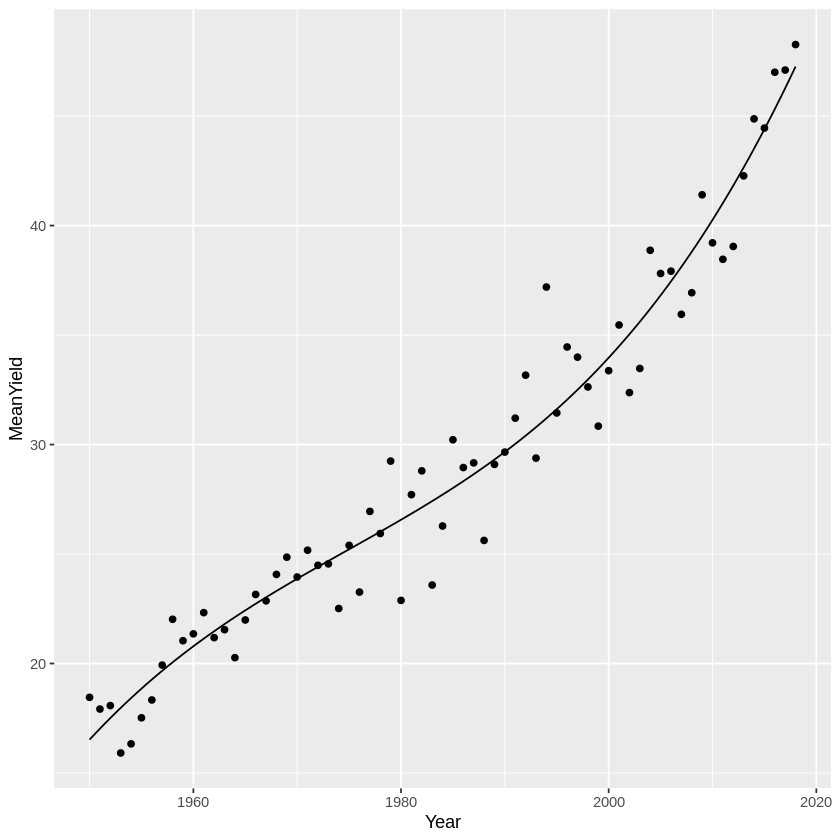

In [47]:
ggplot(yearlyYield, aes(Year, MeanYield)) +
    geom_point() +
    stat_function(fun = modFunc)

In [48]:
tail(yearlyYield)

Year,MeanYield
<int>,<dbl>
2013,42.27037
2014,44.87300
2015,44.45256
2016,47.00229
2017,47.10215
2018,48.26677


Warning message:
“Removed 40 rows containing missing values (geom_point).”

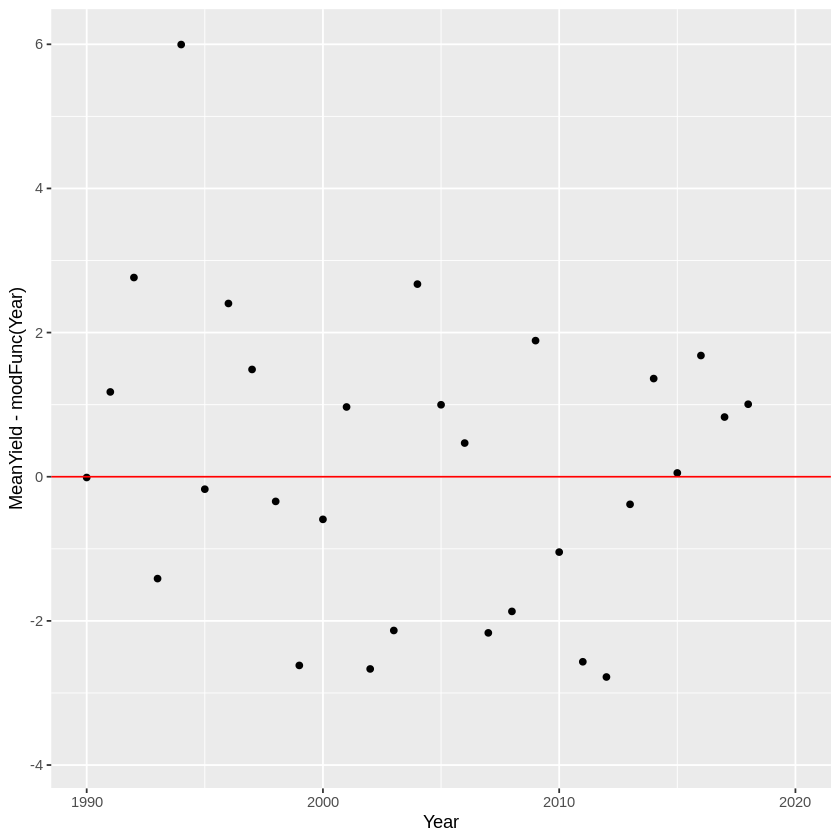

In [49]:
ggplot(yearlyYield, aes(Year, MeanYield - modFunc(Year))) +
    geom_point() +
    geom_hline(aes(yintercept=0), color='red') +
    scale_x_continuous(limits=c(1990, 2020))

Warning message:
“Removed 21 rows containing missing values (geom_path).”

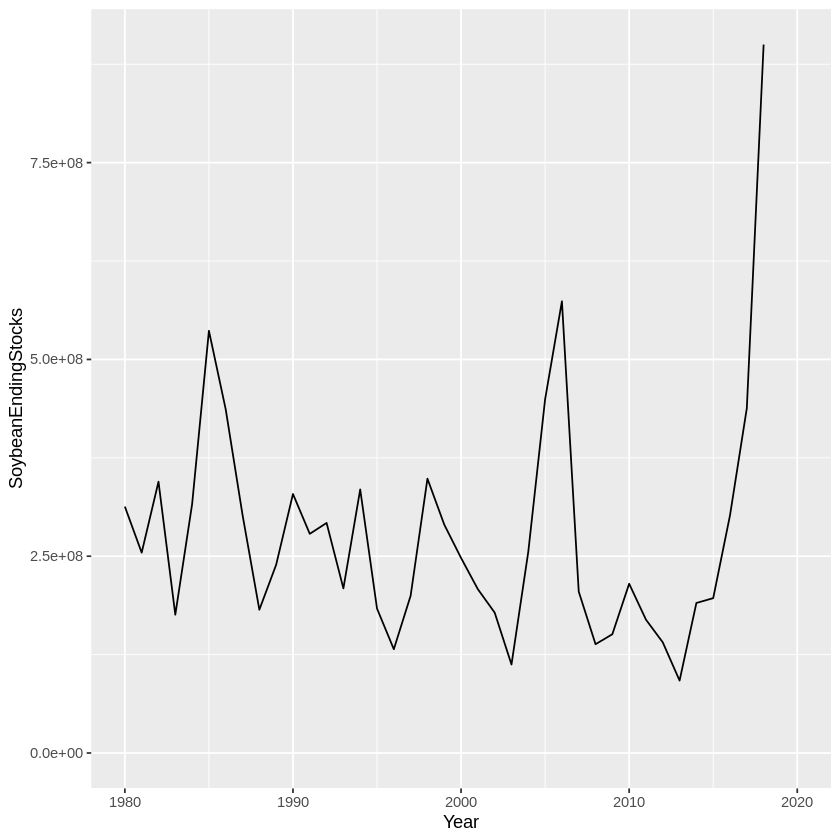

In [50]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanEndingStocks)) +
    scale_x_continuous(limits=c(1980, 2020)) +
    expand_limits(y=0)

Warning message:
“Removed 41 rows containing missing values (geom_path).”

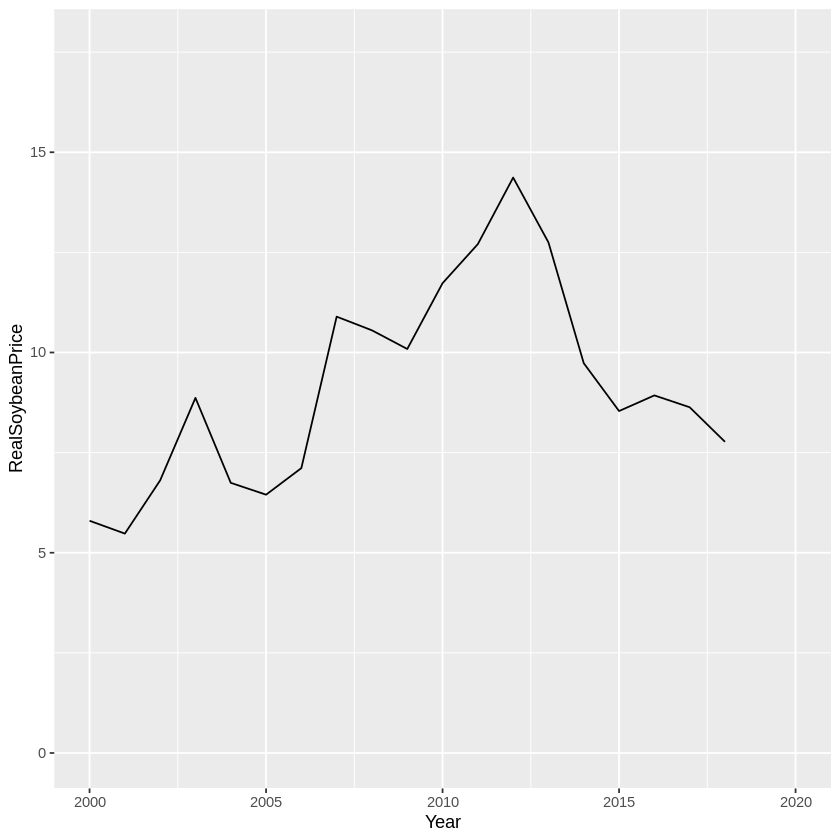

In [51]:
ggplot(lagPrices) +
    geom_line(aes(Year, RealSoybeanPrice)) + 
    scale_x_continuous(limits=c(2000, 2020)) +
    expand_limits(y=0)

In [52]:
yieldsAndPrice <- lagPrices %>% 
    select(Year, RealSoybeanPrice) %>% 
    inner_join(yearlyYield, 'Year') %>% 
    mutate(Residual = MeanYield - modFunc(Year))
tail(yieldsAndPrice)

Year,RealSoybeanPrice,MeanYield,Residual
<dbl>,<dbl>,<dbl>,<dbl>
2013,12.747829,42.27037,-0.38276142
2014,9.732319,44.87300,1.36202631
2015,8.538202,44.45256,0.05269983
2016,8.928706,47.00229,1.68171255
2017,8.632623,47.10215,0.82821957
2018,7.770026,48.26677,1.00605518


Warning message:
“Removed 20 rows containing missing values (geom_point).”

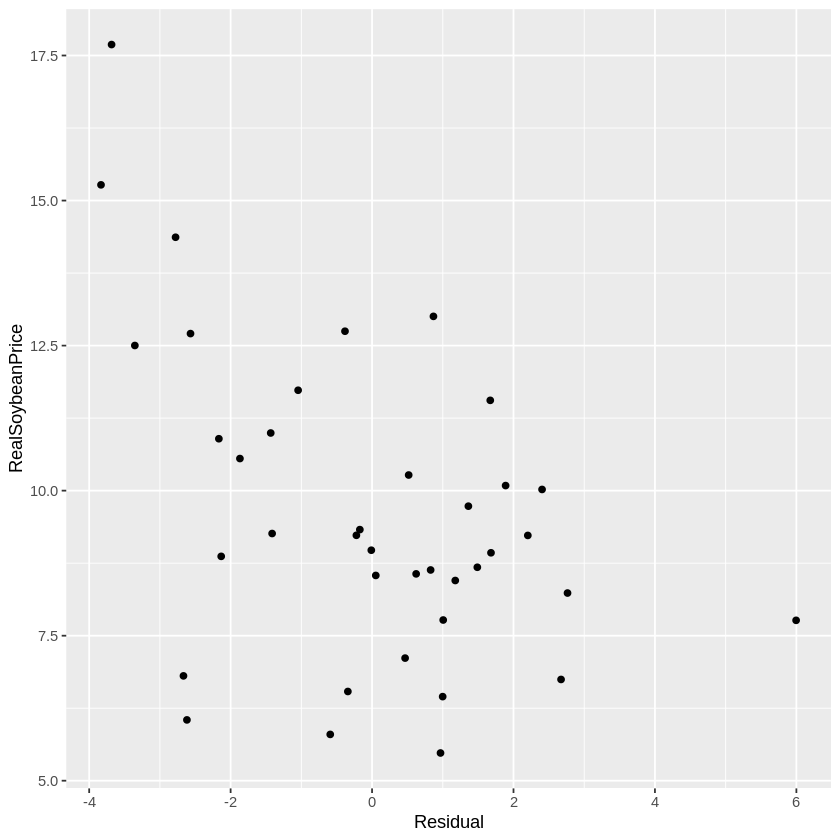

In [53]:
ggplot(yieldsAndPrice) +
    geom_point(aes(Residual, RealSoybeanPrice))

In [54]:
summary(lm(RealSoybeanPrice~Residual, data=yieldsAndPrice))


Call:
lm(formula = RealSoybeanPrice ~ Residual, data = yieldsAndPrice)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1226 -1.2108 -0.0345  1.5333  5.8803 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6044     0.3859  24.886  < 2e-16 ***
Residual     -0.5984     0.1862  -3.215  0.00271 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.41 on 37 degrees of freedom
  (20 observations deleted due to missingness)
Multiple R-squared:  0.2183,	Adjusted R-squared:  0.1972 
F-statistic: 10.33 on 1 and 37 DF,  p-value: 0.00271


Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_label).”

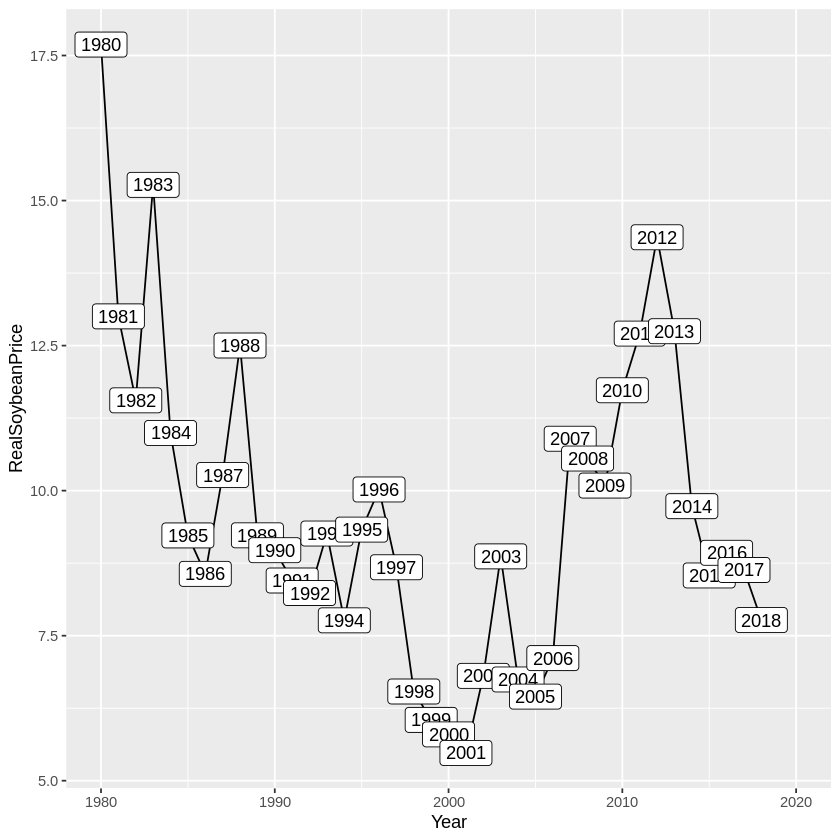

In [55]:
ggplot(lagPrices) +
    geom_line(aes(Year, RealSoybeanPrice)) +
    scale_x_continuous(limits=c(1980, 2020)) +
    geom_label(aes(Year, RealSoybeanPrice, label=Year))

Notable times: 1983, 1988, 1996, 2003  
Notable ranges: 1996-2001, 2005-2007, 2009-2012

Warning message:
“Removed 21 rows containing missing values (geom_path).”Warning message:
“Removed 21 rows containing missing values (geom_path).”

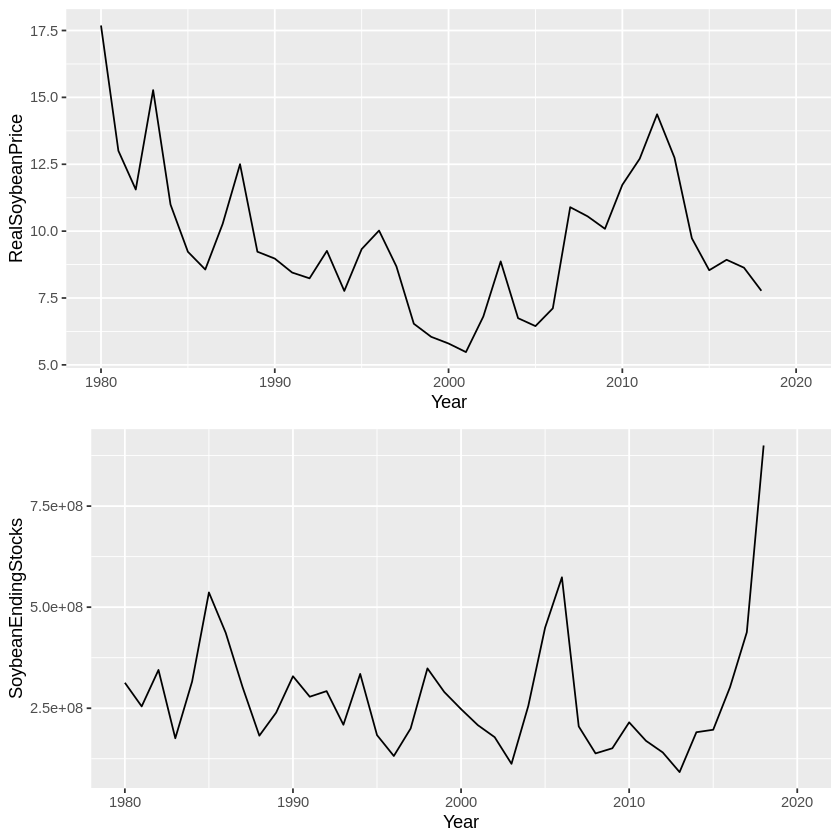

In [56]:
p1 <- ggplot(lagPrices) +
    geom_line(aes(Year, RealSoybeanPrice)) +
    scale_x_continuous(limits=c(1980, 2020))

p2 <- ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanEndingStocks)) +
    scale_x_continuous(limits=c(1980, 2020))

grid.arrange(p1, p2)

Warning message:
“Removed 29 rows containing missing values (geom_path).”

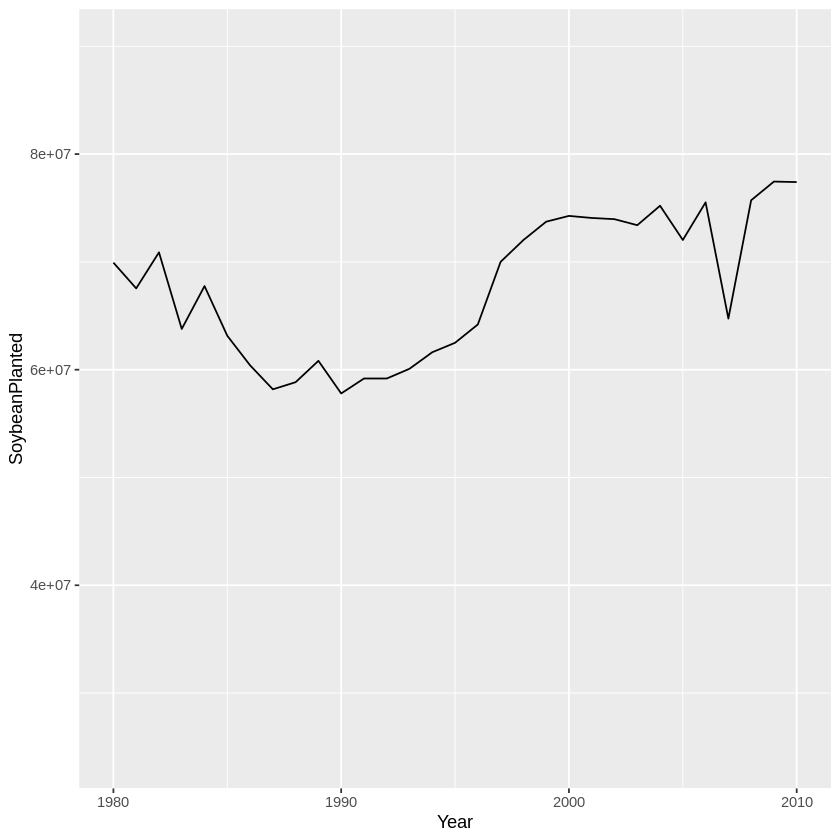

In [57]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanPlanted)) +
    scale_x_continuous(limits=c(1980, 2010))

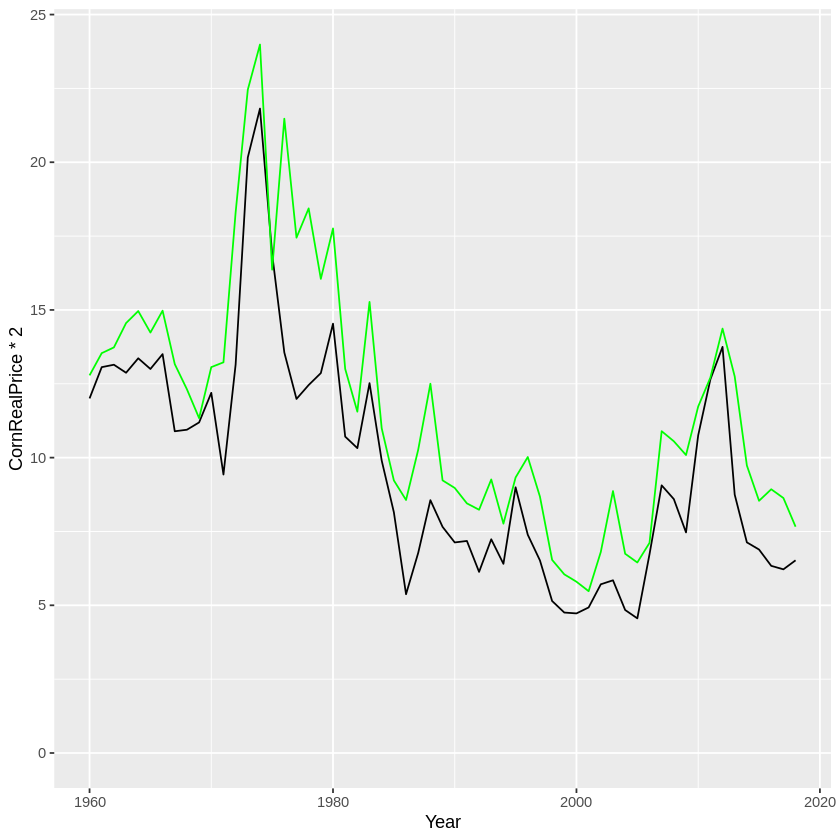

In [58]:
ggplot(cornSoybean) +
    geom_line(aes(Year, CornRealPrice * 2)) +
    geom_line(aes(Year, SoybeanRealPrice), color='green') +
    expand_limits(y=0)

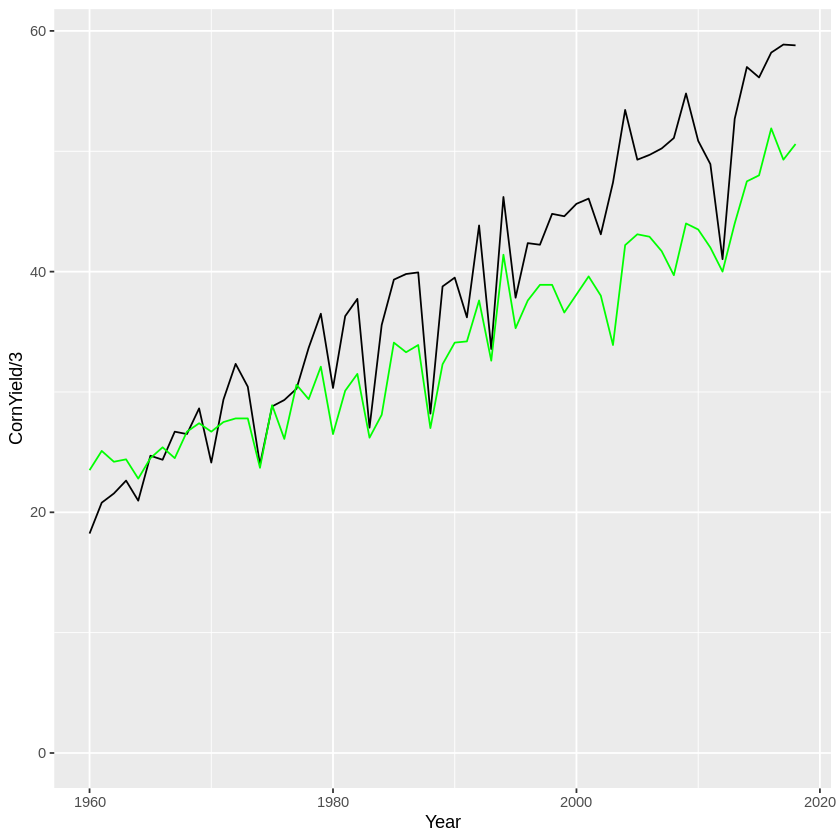

In [59]:
ggplot(cornSoybean) +
    geom_line(aes(Year, CornYield / 3)) +
    geom_line(aes(Year, SoybeanYield), color='green') +
    expand_limits(y=0)

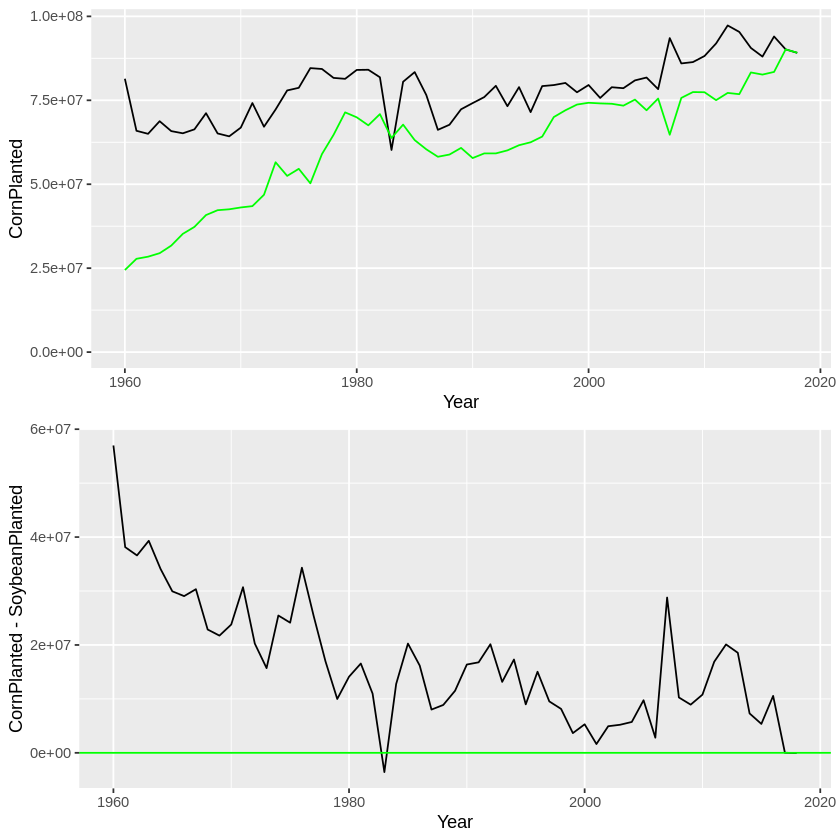

In [60]:
p1 <- ggplot(cornSoybean) +
    geom_line(aes(Year, CornPlanted)) +
    geom_line(aes(Year, SoybeanPlanted), color='green') +
    expand_limits(y=0)
p2 <- ggplot(cornSoybean) +
    geom_line(aes(Year, CornPlanted - SoybeanPlanted)) +
    geom_hline(yintercept=0, color='green')
grid.arrange(p1, p2)

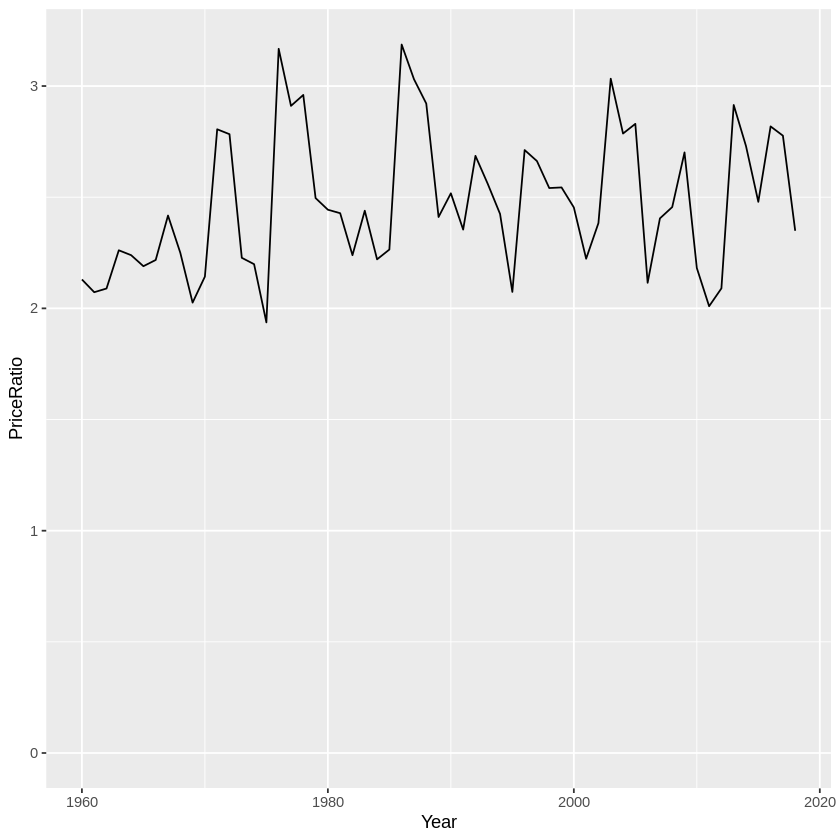

In [61]:
ggplot(cornSoybean) +
    geom_line(aes(Year, PriceRatio)) +
    expand_limits(y=0)

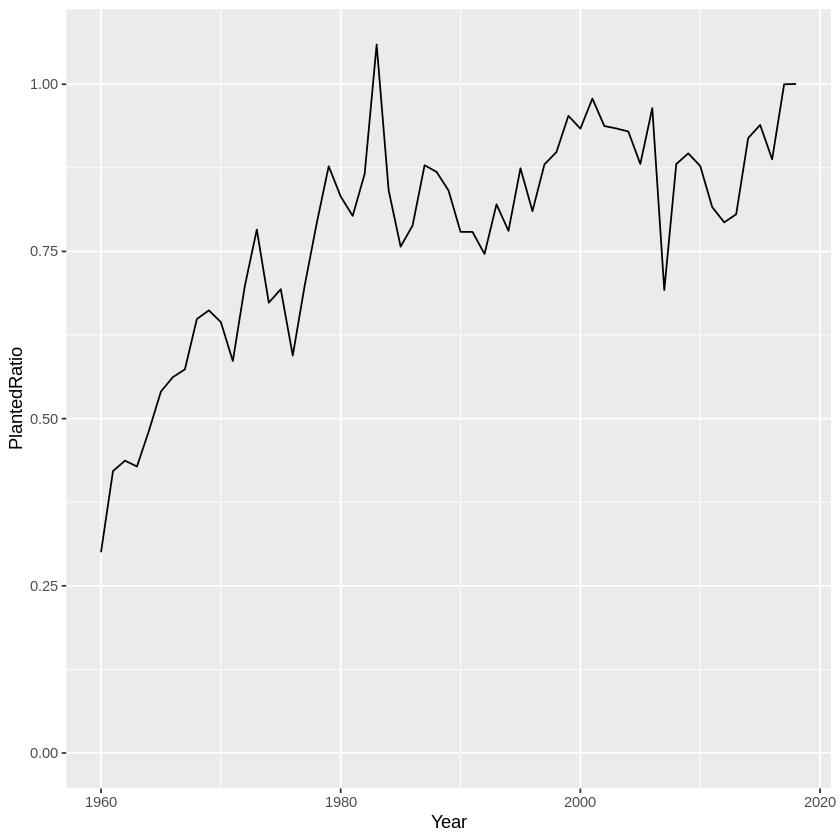

In [62]:
ggplot(cornSoybean) +
    geom_line(aes(Year, PlantedRatio)) +
    expand_limits(y=0)

In [63]:
summary(lm(NextPlantedRatioChange~PriceRatio, data=cornSoybean))


Call:
lm(formula = NextPlantedRatioChange ~ PriceRatio, data = cornSoybean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25083 -0.04468  0.01213  0.04020  0.20308 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.21618    0.08074  -2.677  0.00972 **
PriceRatio   0.09221    0.03235   2.850  0.00611 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.078 on 56 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1267,	Adjusted R-squared:  0.1111 
F-statistic: 8.122 on 1 and 56 DF,  p-value: 0.006108


Warning message:
“Removed 1 rows containing missing values (geom_point).”

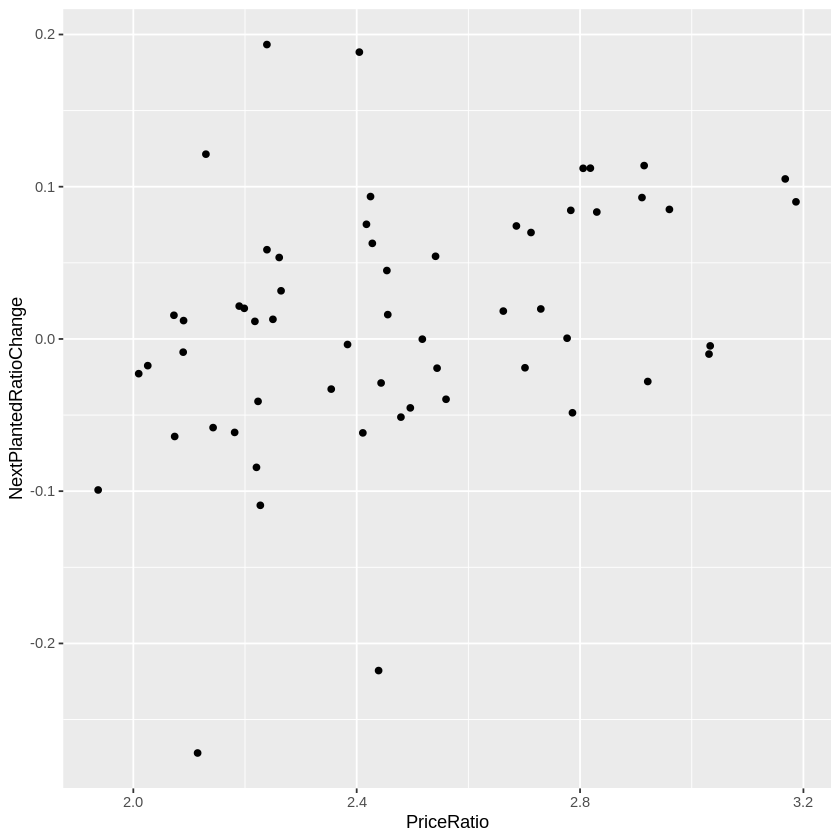

In [64]:
ggplot(cornSoybean, aes(PriceRatio, NextPlantedRatioChange)) +
    geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_path).”

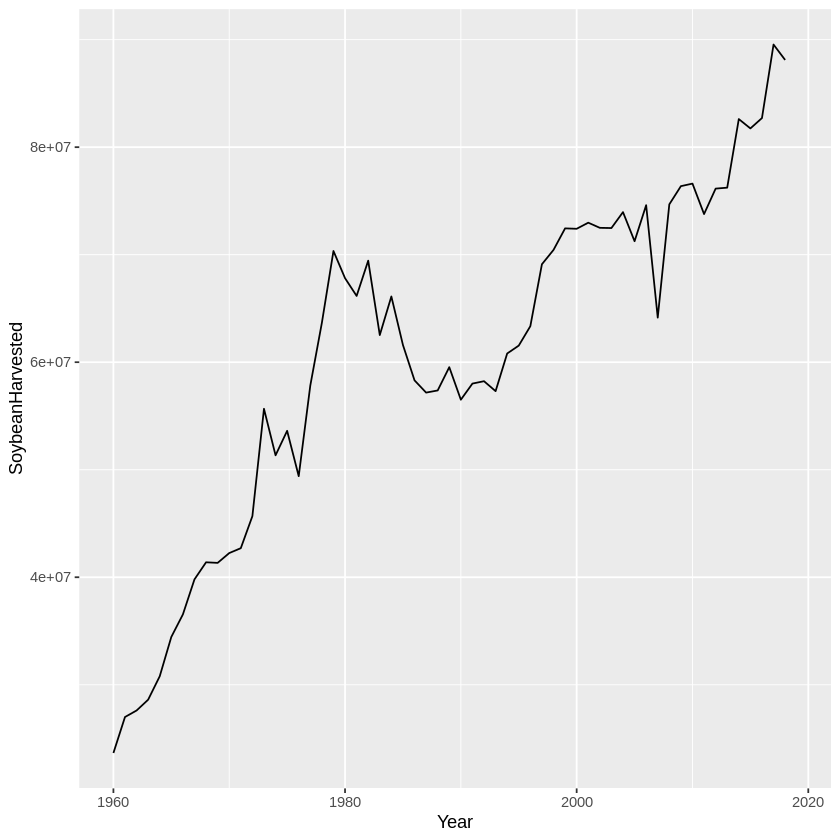

In [67]:
ggplot(yearlyDf) +
    geom_line(aes(Year, SoybeanHarvested))

In [68]:
filter(yearlyDf, Year > 2015) %>% 
    select(Year, SoybeanPlanted, SoybeanHarvested)

Year,SoybeanPlanted,SoybeanHarvested
<int>,<int>,<int>
2016,83453000,82706000
2017,90162000,89542000
2018,89196000,88110000
2019,NA,NA
